In [1]:
from IPython.core.display import Image, display

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  

In [3]:


import seaborn as sns


# Introducción a la ingeniería de características

### Aprendizaje Automático Intermedio e Ingeniería de Características

#### Febrero 2021

**Emilio Parrado Hernández, Vanessa Gómez Verdejo, Pablo Martínez Olmos**

Departamento de Teoría de la Señal y Comunicaciones

**Universidad Carlos III de Madrid**

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

## Contenidos que se van a tratar a lo largo de la sesión

- Repaso del uso de técnicas de aprendizaje automático con *scikit learn*
- Fundamentos de ingeniería de características para variables numéricas
  - Escalados y normalizaciones
  - Discretizaciones
  - Transformaciones de variable
  - Combinaciones básicas variables
- Fundamentos de ingeniería de características para variables categóricas 
  - *One-hot-encoding* y variantes
  - *Hashing* de características
  - Conteo de *bins*


<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

# 1 Introducción a la Ingeniería de Características

## 1.1 Repaso de conceptos de  aprendizaje automático

### Aprendizaje automático

Extraer y explotar **patrones** presentes en **datos históricos** para resolver una tarea que nos proporciona una respuesta a una pregunta de negocio.

Tipos de aprendizaje automático:
- Aprendizaje **supervisado**: Hacer predicciones sobre datos nuevos.
    - Ejemplo: a la vista de los datos de una operación **estimar** la probabilidad de que se cierre
- Aprendizaje **no supervisado**: Extraer estructura presente en los datos.
    - Ejemplo: Segmentar los clientes de un determinado negocio en grupos que compartan patrones similares

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

### Workflow típico de aprendizaje automático

El procedimiento típico para resolver un problema mediante la aplicación de técnicas de Aprendizaje Automático pasa por las siguientes etapas

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTERMEDIO/ML_pipeline.jpg' width=800 />


<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

### Datos crudos

Observaciones del **mundo real**:

    - Precios y volúmenes de acciones negociadas en mercados
    - Comentarios de analistas de bolsa publicados en prensa
    - Datos biométricos personales (pulsaciones, temperatura, peso, etc)
    - Datos de transacciones de clientes

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

### Modelo

Función **matemática** que describe relaciones entre diferentes aspectos de los datos. 

- Ejemplo, en una estrategia de *trading* el número de acciones a negociar durante el siguiente intervalo temporal puede depender de:
    1. El volumen de acciones que habitualmente se negocie durante ese intervalo en días pasados
    2. Si hoy desde la apertura del mercado se está negociando más o menos volumen de acciones que los días pasados
    3. Si el precio se mueve a nuestro favor o en nuestra contra
    4. El volumen de la orden que falta por ejecutar
    5. El tiempo hasta cierre de mercado

Toda la información que emplea el modelo para hacer su predicción se encuentra en los datos en crudo, pero muchas veces el **formato** de esta información **no es numérico** y no se puede emplear directamente **dentro del modelo**.

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

### Características (*features*)

- Se encargan de **conectar los datos crudos con el modelo**.

- Son **representaciones numéricas de los datos crudos**.

- Las **características están muy ligadas al modelo**, hay modelos que necesitan determinados tipos de características


#### Ingeniería de características 
encontrar las características más apropiadas para unos datos y modelo determinados. 

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

## 1.2 Ingeniería de características (*feature engineering, FE*)

- **Transformar los datos crudos en características** que representen el problema para el modelo del mejor modo posible

- Objetivo **mejorar las prestaciones del algoritmo**. Posibilita que el algoritmo explote mejor la información contenida en los datos para extraer los patrones que resuelvan el problema de negocio.

- Ingeniería de características conecta la **ingeniería de datos** con la ingeniería de aprendizaje automático (diseñar algoritmos de aprendizaje de modelos sobre datos limpios).


        
<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

- **Entrada** del bloque de FE:
   - datos en crudo (por ejemplo datos de transacciones)
   - datos numéricos directamente leídos de sensores (variables, atributos, todavia no son *features*)
   - datos ruidosos, redundantes, incompletos, "sucios"
- **Salida** del bloque de FE:
    - Matriz de datos de entrada para entrenar/evaluar un modelo de aprendizaje automático:
        - Cada fila es una observación
        - Cada columna es una característica
        
<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

### Evaluación del impacto de aplicar ingeniería de características 

1. Establecer las prestaciones *baseline*
    - Clasificación con $K$ clases:
        - $1/K$ si las clases están balanceadas
        - Acierto de elegir siempre la clase mayoritaria
    - Regresión: Acierto de predecir siempre con la media (aproximadamente $R^2=0$)

2. **Aplicar** distintas técnicas de **FE** a los algoritmos de aprendizaje automático que empleemos

3. **Comparar** las prestaciones de cada una de las técnicas de FE con el *baseline*. Para ello hay que elegir una **métrica**:
    - Clasificación: acierto en *5 fold cross validation*
    - Regresión: Error cuadrático medio (MSE) ó coeficiente $R^2$ promediado con 5 fold cv
    - Clustering: Coeficiente de silueta
    
4. **Decidir** si el incremento en la mejora de las prestaciones debido a la introducción de la etapa de FE es significativo y, de ser así, añadir la etapa al *pipeline* de procesamiento de los datos
 

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

### Tipos de características 

- Datos **estructurados o no estructurados**

- Datos **cuantitativos** o datos **cualitativos**

- Cuatro niveles de datos

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

###  Datos crudos estructurados o no estructurados

- **Datos estructurados** están organizados en filas y columnas:
    - cada **fila** se corresponde con una **observación**
    - cada **columna** es una variable (o **característica**) que se ha medido para esa observación.
    
    Por ejemplo hay aparatos de medida que registran sus mediciones estructuradamente, con un campo identificador de medida, la fecha en la que se ha realizado la medición y una columna para cada una de las magnitudes medidas.
    
    
    
- **Datos no estructurados** por ejemplo texto en crudo como los logs de un programa informático. Se podría considerar que cada fila sigue siendo una observación (cada entrada del log es una fila), pero solo van a tener una columna, que contiene el texto crudo correspondiente a cada entrada del log.


<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

###  Datos crudos cuantitativos o cualitativos

- **Datos cuantitativos** son datos **numéricos**. Por ejemplo:
    - constantes biométricas (temperatura corporal, tensión arterial, pulsaciones, etc)
    - Indicadores técnicos de mercado (precios, volúmenes negociados, indicadores sobre estas variables, etc)
    - La temperatura del ambiente medida en grados Celsius, volumen de precipitaciones en $l/m^2$, etc
    
    
- **Datos cualitativos** son datos **categóricos**. Por ejemplo:
    - Comunidad autónoma en la que reside un cliente
    - Profesión del cliente
    - Lista de artículos comprados por el cliente en el último pedido
    - Contenido que ha visto el cliente en el último mes
    - Lista de productos que tiene contratados el cliente
    - Describir el clima como soleado o nubloso, lluvioso, etc.
    

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

- Hay casos en los que se mezclan las naturalezas cualitativas y cuantitativas de los datos, por ejemplo en los ratings que hacen los usuarios, donde como cada usuario tiene un criterio distinto, no está 100% claro que podamos emplear un rating de forma numérica. Ejemplo:
    - Rating de un restaurante con 1 a 5 estrellas (tira más a cuantitativo)
    - Rating de un restaurante con: "no volveré", "diría que OK", "me gustó", "me encantó", "un *must*!" (tira más a cualitativo)

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

###  Cuatro niveles de datos

1. **Datos nominales** son puras categorías. Por ejemplo:
    - Variables booleanas (True or False)
    - tipo de sangre (A+, B-, 0+, etc)
    - profesión, estado civil (soltero, casado, viudo, divorciado, etc)
    - ciudad de residencia, nacionalidad
    
    
2. **Datos ordinales** son datos categóricos pero tienen un orden natural, es decir, se puede establecer que unas categorías son mejores o mayores que otras. Por ejemplo:
    - Rating de productos o servicios
    - Mes del año en el que se ha contratado un producto
    - Notas de una asignatura: Suspenso, aprobado, notable, sobresaliente
    

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

3. **Datos en intervalo** son datos numéricos, cuantitativos. Tiene sentido sumarlos o restarlos. Por ejemplo:
    - Temperatura: Si hace 35 grados Celsius en Madrid y 29 grados en Bilbao, podemos establecer que hay una diferencia de 6 grados entre las dos ciudades.
    - Los *ratings* no se consideran datos en intervalo porque si por ejemplo un usuario concede un 7 sobre 10 a un producto y otro usuario concede un 4 sobre 10, la suma de los *ratings* es 11, que no tiene sentido. O la resta de los ratings sería 3, pero este 3 no puede considerarse un rating.
    
    
4. **Datos en razón** son datos numéricos, cuantitativos, donde además de la suma y resta del nivel **intervalo** existe el concepto de **cero verdadero**. Debido a esto los valores de estas variables se pueden multiplicar y dividir. Por ejemplo:
    - Dinero en una cuenta: 100 euros es el doble de 50 euros porque $100/50=2$
    - 10mg de penicilina es la mitad de 20mg de penicilina porque $10/20=0.5$
    - Contraejemplo con la temperatura: Si algo está a 100 grados no está el doble de caliente que algo que está a 50 grados. Los grados celsius no tienen **cero verdadero**

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

###  Operaciones matemáticas que permite cada uno de los cuatro niveles de datos

- **Datos nominales**:
    - conteo de ocurrencias, porcentajes de ocurrencias
    - moda estadística (valor más frecuente)
    - Se pueden representar con diagramas de barras o tartas
    
    
- **Datos ordinales** :
    - además de las de los datos nominales se pueden ordenar
    - mediana estadística, percentiles
    - Se pueden representar con barras, tartas, stems & leaves o *boxplot*
    
- **Datos en intervalo**:
    - Se pueden sumar y restar
    - Media y desviación típica
    - Se pueden representar con boxplots y stems & leaves
    
- **Datos en razón** :
    - cualquier operación, por ejemplo logaritmos
    - cualquier estadístico
    - Se pueden representar con histogramas

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

# 2 Ejemplo: base de datos YELP academic

[Yelp_academic_dataset](https://www.kaggle.com/yelp-dataset/yelp-dataset) es una base de datos que contiene revisiones de negocios y establecimientos en 11 áreas metropolitanas de 4 países recogidas de usuarios del servicio Yelp. Sus principales motivaciones son:
- **análisis de sentimientos** con **procesado de lenguaje natural**, es decir, saber si las revisiones son positivas o negativas
- **análisis de grafos**, es decir, descubrir patrones de consumo a través de las relaciones entre los usuarios del servicio.

En este *notebook* no vamos a ser tan ambiciosos y nos vamos a centrar en una tarea de predecir el *rating* en estrellas que va a recibir un determinado negocio en función de algunas variables numéricas.

En primer lugar cargamos la base de datos a través de un fichero `json`

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

In [1]:
import pandas as pd # organize data in dataframes
import json # read the json file with data
from zipfile import ZipFile 
from io import BytesIO
import urllib.request

url = urllib.request.urlopen("http://www.tsc.uc3m.es/~emipar/BBVA/INTERMEDIO/DATASETS/yelp_academic_dataset_business.json.zip")
contained_file = 'yelp_academic_dataset_business.json'
with ZipFile(BytesIO(url.read())) as my_zip_file:
    data_yelp_file = my_zip_file.open(contained_file)
    data_yelp_df = pd.DataFrame([json.loads(x) for x in data_yelp_file.readlines()])

Ahora tenemos la base de datos cargada en un `dataframe` llamado `data_yelp_df`

In [2]:
data_yelp_df.head() # visualizar los primeros 5 registros

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


Visualizamos algunos registros individualmente para hacernos una idea del detalle de todos los campos

In [3]:
for ii in [17, 1234, 9856]:
    print(data_yelp_df.loc[ii])
    print("-------------------------------------------------------------")

business_id                                nIEhsGbw0vJuYl05bzzj6Q
name                                            Bloom & Blueprint
address                                   2115 E Cedar St, Unit 3
city                                                        Tempe
state                                                          AZ
postal_code                                                 85281
latitude                                                  33.4115
longitude                                                -111.895
stars                                                         4.5
review_count                                                    7
is_open                                                         1
attributes      {'BusinessAcceptsCreditCards': 'True', 'Restau...
categories      Event Planning & Services, Wedding Planning, F...
hours                                                        None
Name: 17, dtype: object
----------------------------------------------------

## Estructura de los campos

Algunos de los campos de la base de datos pueden clasificarse más o menos siguiendo el criterio de tipos de características que hemos visto antes:
- `business_id`: característica categórica nominal
- `name`: característica categórica nominal
- `address`: característica categórica nominal

En principio estos 3 primeros campos son redundantes, es decir, pueden emplearse para identificar el negocio.

- `city`: característica categórica nominal
- `state`: característica categórica nominal
- `postal code`: característica categórica nominal. Puede parecer un entero, pero el orden numérico no tiene que ver con un orden de los ejemplos

Estos 3 campos siguientes complementan la identificación del negocio

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

- `latitude`: característica numérica intervalo
- `longitude`: característica numérica intervalo

    Las catalogamos como intervalo porque un negocio que está en el paralelo 20 no está "el doble al sur" que un negocio en el paralelo 40.


- `stars`: característica ordinal. Vamos a emplearla como *target*.
- `review_count` característica numérica razón. Si un negocio tiene 200 comentarios tiene el doble de comentarios que un negocio que sólo tenga 100
- `is_open`: característica categórica nominal, es booleana

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

Vamos a ver con un poco más de detalle en los campos `attributes`, `categories` y `hours`


In [5]:
for ii in [17, 1234, 9856]:
    print(data_yelp_df.loc[ii])
    print("---------------------------")
    for jj in ['categories', 'hours','attributes']:
        print(jj)
        print(data_yelp_df.loc[ii,jj])
        print('...................')
        
    print("==========================================================\n")

business_id                                nIEhsGbw0vJuYl05bzzj6Q
name                                            Bloom & Blueprint
address                                   2115 E Cedar St, Unit 3
city                                                        Tempe
state                                                          AZ
postal_code                                                 85281
latitude                                                  33.4115
longitude                                                -111.895
stars                                                         4.5
review_count                                                    7
is_open                                                         1
attributes      {'BusinessAcceptsCreditCards': 'True', 'Restau...
categories      Event Planning & Services, Wedding Planning, F...
hours                                                        None
Name: 17, dtype: object
---------------------------
categories
Event Plannin


- `attributes`: campo estructurado, formado por un diccionario
- `categories`: campo estructurado, formado por una lista
- `hours`: campo estructurado, formado por un diccionario

Estos tres últimos campos no pueden considerarse **características** porque no pueden alimentar directamente un modelo numérico de aprendizaje automático.

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

## 2.1 División entre entrenamiento y test

Para evaluar la capacidad de generalización de los modelos que construyamos podemos dividir la base de datos en dos particiones, entrenamiento y test, al 50% cada una.

In [6]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data_yelp_df, test_size=0.5, random_state=42)
 

## 2.2 Problema básico de predicción de rating

El problema que vamos a intentar resolver con esta base de datos es **predecir** el *rating* promedio que tiene cada establecimiento del conjunto de test mediante la construcción de modelos predictivos (aprendizaje supervisado) usando los datos del conjunto de entrenamiento.

Una versión bastante simplificada del problema consiste en predecir el *rating* a partir del número de revisiones que tenga un establecimiento. La intuición detrás de este modelo es que en general los mejores negocios recibirán más clientes y por ello más revisiones. 

En primer lugar vamos a descubrir cómo están codificados los *ratings*  explorando el campo `stars` de la base de datos.

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

In [7]:
import numpy as np # to get access to math functionalities

In [8]:
print("Values of field 'stars'")
np.unique(data_yelp_df['stars'].values)

Values of field 'stars'


array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

Los *ratings* son números entre 1 y 5, con saltos de medio punto. Parece que tiene sentido emplear un modelo de **regresión** para predecir un valor numérico.

El modelo más sencillo que puede capturar este patrón es una **regresión lineal** 
$$
y = w_0 + w_1 x
$$
Donde $y$ es el *rating*, $x$ es el número de revisiones y $w_0$ y $w_1$ son dos constantes que hay que aprender con los datos de entrenamiento (son los parámetros del modelo).

Vamos a emplear la implementación [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) de *scikit learn*.

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
global_results ={} # to store the results of the different models for comparison purposes

Las implementaciones de *scikit learn* trabajan con `numpy arrays` por lo que debemos extraer estos *arrays* de los `dataframes` correspondientes

In [11]:
# Training set observations
X_train = train_df['review_count'].values.reshape(-1,1) # column vector, 1 feature and many rows
# Training set targets
Y_train = train_df['stars'].values
# Test set observations
X_test = test_df['review_count'].values.reshape(-1,1)
# Test set targets
Y_test = test_df['stars'].values

Entrenamiento del modelo

In [12]:
linear_model = LinearRegression().fit(X_train, Y_train)

Evaluamos el modelo. Por defecto los modelos de regresión de *scikit learn* muestran el [estadístico $R^2$](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) para evaluar las prestaciones. 
$$
R^2 = 1- \frac{\sum_{i=1}^N(\hat f(\mathbf x_i)-y_i)^2}{\sum_{i=1}^N(\bar y-y_i)^2}
$$
donde $N$ es el tamaño del conjunto que se usa para evaluar el modelo, $f(\mathbf x_i)$ es la predicción que hace el modelo para cada observación $\mathbf x_i$ de dicho conjunto, $y_i$ es el *target* verdadero para $\mathbf x_i$ e $\bar y$ es el promedio de los $N$ *targets* $y_i$, $i=1,\dots,N$.

Si las predicciones no tienen errores, entonces $R^2=1$, que es su valor máximo. A medida que aparecen errores de predicción, el valor de $R^2$ decrece. Mientras $R^2>0$ el regresor está dando prestaciones mejores que la media (predicción *baseline*) y si $R^2<0$ entonces el regresor está dando predicciones peores que usar la media para predecir todas las muestras.

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

In [13]:
print("Score with the training data R^2={0:.4f}".format(linear_model.score(X_train, Y_train)))
print("Score with the test data R^2={0:.4f}".format(linear_model.score(X_test, Y_test)))
global_results['linear model'] = linear_model.score(X_test, Y_test)

Score with the training data R^2=0.0025
Score with the test data R^2=0.0025


El $R^2$ obtenido revela que el predictor prácticamente equiparable a usar la media de los *ratings* para todos los negocios. Podemos verlo analizando los coeficientes del modelo

In [15]:
print("w0 = {0:.4f}".format(linear_model.intercept_))
print("w1 = {0:.4f}".format(linear_model.coef_[0]))

w0 = 3.5215
w1 = 0.0004


El número de revisiones tiene que ser muy alto para que al multiplicarse por $w_1$ cambie en algo $w_0$.

También nos damos cuenta de que el modelo no va a dar predicciones de *ratings* por debajo de 3.5 estrellas...

In [16]:
import matplotlib.pyplot as plt

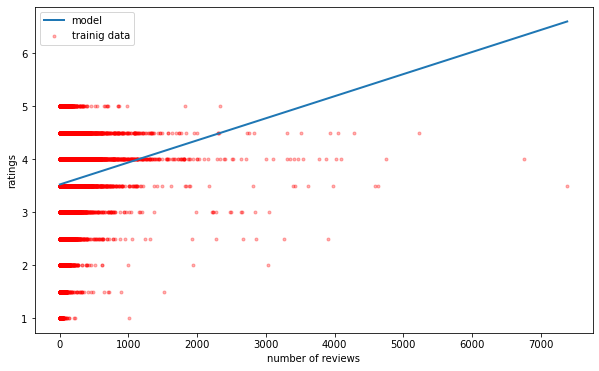

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(X_train, Y_train,marker='.',alpha=0.3,label='trainig data',color='red')
plt.plot([min(X_train), max(X_train)], 
         linear_model.predict(np.array([min(X_train), max(X_train)]).reshape(-1,1)),
         linewidth=2,
        label='model')
plt.xlabel('number of reviews')
plt.legend()
_=plt.ylabel('ratings')


   
# 3. Ingeniería de características numéricas

Los datos numéricos pueden ser directamente procesados mediante modelos matemáticos, pero a veces necesitan de algo de ingeniería de características para mejorar las prestaciones de estos modelos.

## Consideraciones a tener en cuenta

- Importancia de la **magnitud** de la característica: 
    - Simplemente hace falta saber si la característica es **positiva o negativa**,
        - Por ejemplo saber si un precio sube o baja
    - o hace falta tener una idea del **orden de la magnitud** de la característica 
        - Por ejemplo saber el orden del volumen de acciones negociadas en millares, centenas de millares, millones...
    - o necesitamos conocer la **magnitud con exactitud** 
        - Por ejemplo saber un precio con tres decimales de precisión


<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />


- **Escala** de las diferentes características que forman las observaciones. 
    - Algunos modelos basados en **distancias**, tales como kNN, *Support Vector Machines*, K-medias son sensibles a las diferentes rangos de variaciones de las características. Si empleamos algunos de estos métodos es conveniente **escalar los rangos** de las características.
    - Los modelos basados en **funciones lógicas**, tales como árboles de decisión, *random forests*, *gradient boosting machines* **no son sensibles a los rangos** de las variables. Salvo que estos rangos sean **variantes en el tiempo** (como los conteos o las variables que acumulan ocurrencias) y sea necesario reescalar cada cierto tiempo.
    
<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />


- **Distribución de probabilidad** de las características:
    - Los modelos de **regresión lineal** asumen que los errores de predicción siguen una distribución **gaussiana**. En general esta asunción es razonable excepto si el rango de valores que pueda tomar la variable target puede expandir **varios órdenes de magnitud**. Por ejemplo cuando se está trabajando con volúmenes de acciones negociadas en mercado.  En estos casos asumir que los errores de los predictores siguen una distribución gaussiana no es razonable. **Transformar estas variables con el logaritmo** hace que la distribución de la variable transformada se parezca más a una gaussiana.
    
<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />


## 3.1 Transformación logarítmica

En el problema de predicción de *ratings* de YELP vemos que el número de revisiones se expande en varios órdenes de magnitud, por eso el valor de $w_1$ tiene muy complicado acomodar todos estos rangos.

Representamos el **histograma** del número de revisiones para comprobar esto

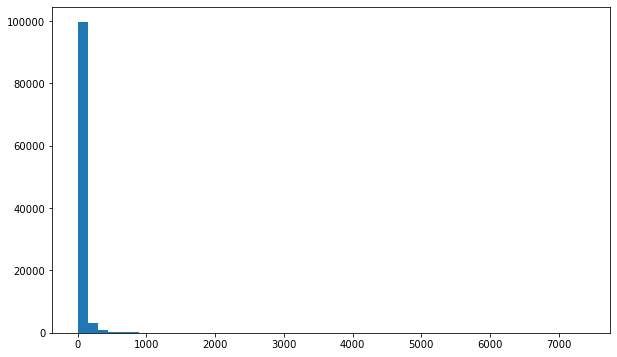

In [22]:
# Number of business vs number of reviews
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
_=plt.hist(X_train, bins=50)

Usamos escala logarítmica en ambos ejes

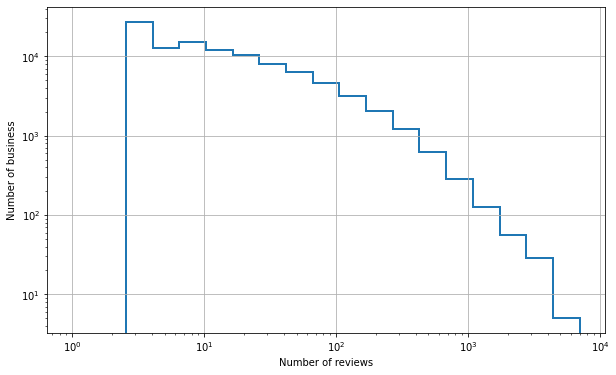

In [21]:
plt.figure(figsize=(10,6))
_=plt.hist(X_train, 
           bins=np.logspace(0,np.log10(7000),20), 
           histtype='step',
          linewidth=2)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of reviews')
_=plt.ylabel('Number of business')
plt.grid()

Vamos a construir otro modelo pero que tome como observación el logaritmo del número de revisiones, para ver si podemos capturar así más variabilidad.

In [23]:
# Log 0 explota : sumar 1
L_X_train = np.log10(X_train+1)
L_X_test = np.log10(X_test+1)

In [24]:
log_linear_model = LinearRegression().fit(L_X_train, Y_train)
print("Score with the training data R^2={0:.4f}".format(log_linear_model.score(L_X_train, Y_train)))
print("Score with the test data R^2={0:.4f}".format(log_linear_model.score(L_X_test, Y_test)))
print("w0 = {0:.4f}".format(log_linear_model.intercept_))
print("w1 = {0:.4f}".format(log_linear_model.coef_[0]))
global_results['linear log model'] = log_linear_model.score(L_X_test, Y_test)

Score with the training data R^2=0.0061
Score with the test data R^2=0.0057
w0 = 3.3577
w1 = 0.1559


In [25]:
print(global_results)

{'linear model': 0.0024658837821776025, 'linear log model': 0.005721720788566698}


Observamos una ligera mejora, pero aún está muy cerca del resultado de aplicar el estimador trivial.

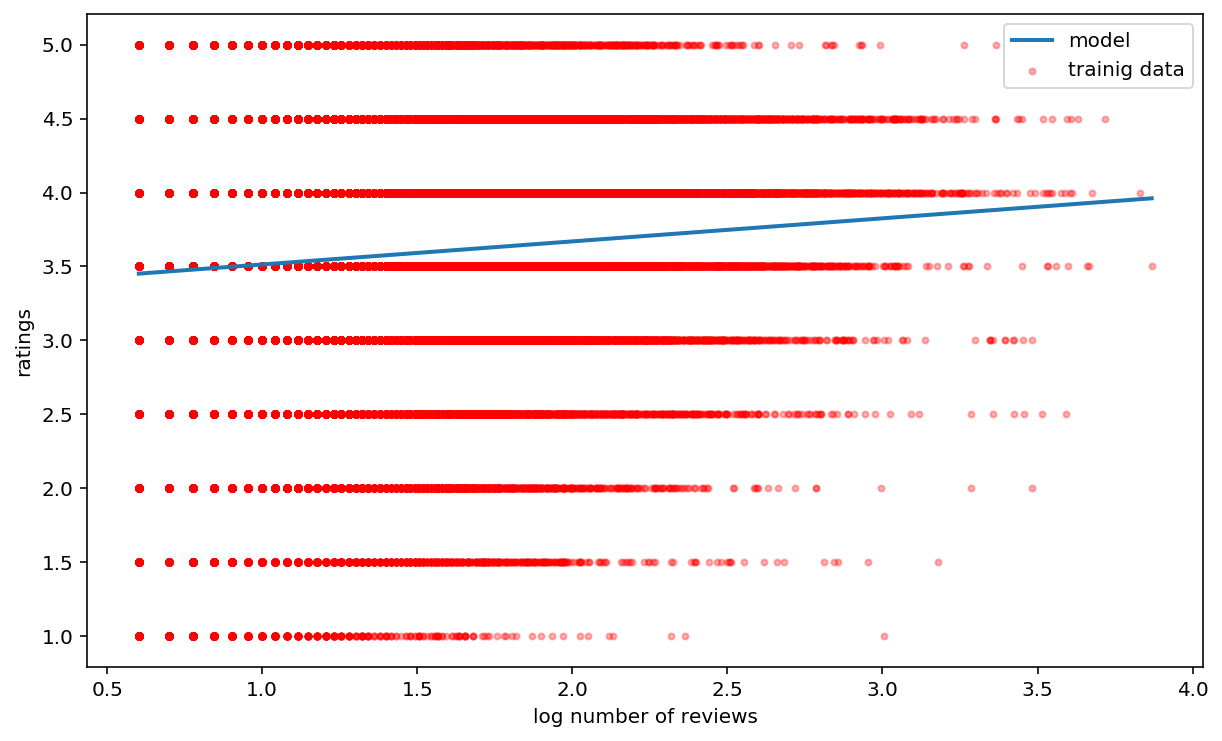

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(L_X_train, Y_train,marker='.',alpha=0.3,label='trainig data',color='red')
plt.plot([min(L_X_train), max(L_X_train)], 
         log_linear_model.predict(np.array([min(L_X_train), max(L_X_train)]).reshape(-1,1)),
         linewidth=2,
        label='model')
plt.xlabel('log number of reviews')
plt.legend()
_=plt.ylabel('ratings')

##  Modelo sólo para restaurantes

Vamos a descomponer el problema para tratar de capturar patrones más claros. Nos quedamos solo con los negocios etiquetados como `"Restaurants"`. La hipótesis que perseguimos es que los usuarios empleen criterios específicos para valorar cada categoría de negocio.

La siguiente función extrae las filas que tengan una determinada categoría dentro del campo `categories`.

In [26]:
def get_category(df, category='Restaurants'):
    categories_ = df["categories"].dropna()
    is_member = categories_[categories_.apply(lambda x:category in x.split(", "))]
    return df.loc[is_member.index].copy()


Nos quedamos con los restaurantes de los conjuntos de entrenamiento y de test.

In [27]:
restaurantes_train = get_category(train_df)
display(restaurantes_train.head())
restaurantes_test = get_category(test_df)
display(restaurantes_test.head())

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
38253,tAKeTTlnuo4boI1f1oulAQ,Village Rainbow,477 Church Street,Toronto,ON,M4Y 2C6,43.664696,-79.380493,3.0,13,0,"{'RestaurantsAttire': 'u'casual'', 'GoodForKid...","Restaurants, Canadian (New), Breakfast & Brunc...",None
122074,71K20-AiZodl9-i3W9w56A,Yours Truly Restaurants,30 N Main St,Chagrin Falls,OH,44022,41.430694,-81.391132,3.5,112,1,"{'Alcohol': 'u'full_bar'', 'GoodForKids': 'Tru...","Restaurants, American (Traditional), Diners","{'Monday': '6:30-22:0', 'Tuesday': '6:30-22:0'..."
91752,5DH-yIBIvlpQopUk7HcTcg,Panera Bread,"2400 S Rancho Dr, Ste 180",Las Vegas,NV,89102,36.145619,-115.172566,3.0,71,1,"{'WiFi': ''free'', 'Alcohol': ''none'', 'Resta...","Sandwiches, Bakeries, Food, Salad, Restaurants...","{'Monday': '6:30-22:0', 'Tuesday': '6:30-22:0'..."
15244,AxYnJ0wYTl0wsT-840ehgQ,Original Joe's Restaurant & Bar,"12100 Macleod Trail SE, Ste 335",Calgary,AB,T2J 7G9,50.943719,-114.069263,3.0,18,0,"{'WiFi': 'u'no'', 'RestaurantsReservations': '...","American (New), Canadian (New), Bars, Nightlif...","{'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ..."
112565,b1p4j51RkgBWsVxob3MmEw,Swiss Chalet Rotisserie & Grill,6970 Financial Dr,Mississauga,ON,L5N 8J4,43.609445,-79.750510,2.5,23,1,"{'Ambience': '{'touristy': False, 'hipster': F...","Canadian (New), Restaurants, American (Traditi...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
140942,8ApG8Oe9-Yh9g_7iB9Nw7Q,The Office Bar and Grill,10767 N 116th St,Scottsdale,AZ,85250,33.584068,-111.830409,3.5,40,0,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, Nightlife, Bars, American (Tradit...",None
180206,_d_nkRmQDRRA0oOaxR-W8Q,Stowaway Pub,3041 Graham Rd,Stow,OH,44224,41.167404,-81.404602,3.0,16,1,"{'Alcohol': 'u'full_bar'', 'WiFi': 'u'free'', ...","Restaurants, Bars, Nightlife, Pubs","{'Monday': '11:0-1:0', 'Tuesday': '11:0-1:0', ..."
1901,tamr4J75GguGhF1hm1wEaA,Jersey Mike's Subs,"555 North Scottsdale Rd, Ste 103",Tempe,AZ,85281,33.434402,-111.925484,3.5,101,1,"{'Alcohol': 'u'none'', 'RestaurantsGoodForGrou...","Fast Food, Sandwiches, Delis, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."
99812,laac2uH1lQVzBjKFUjuA1Q,The Egg Cafe,"9525 Birkdale Crossing, ste 101",Huntersville,NC,28078,35.442754,-80.885860,3.0,24,1,"{'RestaurantsReservations': 'False', 'GoodForM...","Breakfast & Brunch, Restaurants","{'Monday': '7:0-14:0', 'Tuesday': '7:0-14:0', ..."
158965,v9ZRK2k85eFlZ6rLYVbMqQ,Jersey Mike's Subs,4603 East Cactus Rd,Phoenix,AZ,85032,33.598679,-111.984061,3.0,48,1,"{'HasTV': 'True', 'RestaurantsTableService': '...","Sandwiches, Restaurants, Delis, Fast Food","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."


In [28]:
X_train = restaurantes_train['review_count'].values.reshape(-1,1)
Y_train = restaurantes_train['stars'].values
X_test = restaurantes_test['review_count'].values.reshape(-1,1)
Y_test = restaurantes_test['stars'].values
linear_model = LinearRegression().fit(X_train, Y_train)

                         
print("Score with the training data R^2={0:.4f}".format(linear_model.score(X_train, Y_train)))
print("Score with the test data R^2={0:.4f}".format(linear_model.score(X_test, Y_test)))
print("w0 = {0:.4f}".format(linear_model.intercept_))
print("w1 = {0:.4f}".format(linear_model.coef_[0]))
global_results['linear model restaurants'] = linear_model.score(X_test, Y_test)

Score with the training data R^2=0.0193
Score with the test data R^2=0.0188
w0 = 3.3968
w1 = 0.0006


In [29]:
L_X_train = np.log10(X_train+1)
L_X_test = np.log10(X_test+1)

log_linear_model = LinearRegression().fit(L_X_train, Y_train)
print("Score with the training data R^2={0:.4f}".format(log_linear_model.score(L_X_train, Y_train)))
print("Score with the test data R^2={0:.4f}".format(log_linear_model.score(L_X_test, Y_test)))
print("w0 = {0:.4f}".format(log_linear_model.intercept_))
print("w1 = {0:.4f}".format(log_linear_model.coef_[0]))
global_results['linear log model restaurants'] = log_linear_model.score(L_X_test, Y_test)

Score with the training data R^2=0.0371
Score with the test data R^2=0.0409
w0 = 3.0567
w1 = 0.2676


In [30]:
pd.Series(global_results)

linear model                    0.002466
linear log model                0.005722
linear model restaurants        0.018828
linear log model restaurants    0.040943
dtype: float64

La **transformación logarítmica** de los conteos de revisiones produce una **mejora significativa**

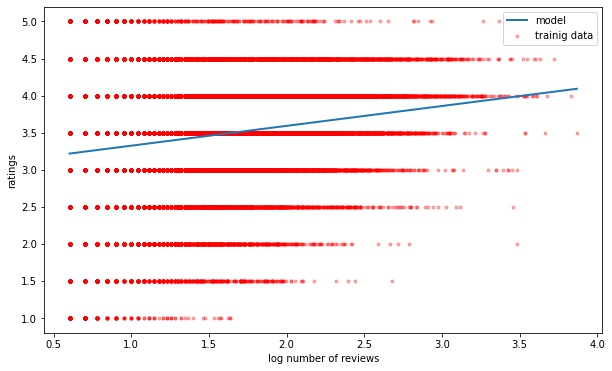

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(L_X_train, Y_train,marker='.',alpha=0.3,label='trainig data',color='red')
plt.plot([min(L_X_train), max(L_X_train)], 
         log_linear_model.predict(np.array([min(L_X_train), max(L_X_train)]).reshape(-1,1)),
         linewidth=2,
        label='model')
plt.xlabel('log number of reviews')
plt.legend()
_=plt.ylabel('ratings')

## 3.2 Siguiente alternativa: cuantificación

Los resultados anteriores muestran que la transformación logarítmica ayuda a controlar el hecho de que el rango de la característica `review_count` ocupe varios órdenes de magnitud.

Una alternativa que podemos emplear es la **cuantificación**, que transforma esta variable continua *float* en una variable entera.

Nos apoyamos en la función [`quantile`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html) de `pandas` para definir los *bins* de la cuantificación

In [33]:
# 10% de los negocios tienen 4 o menos revisiones
deciles = restaurantes_train['review_count'].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9])
print(deciles)

0.1      4.0
0.2      6.0
0.3     10.0
0.4     15.0
0.5     22.0
0.6     34.0
0.7     54.0
0.8     90.0
0.9    178.0
Name: review_count, dtype: float64


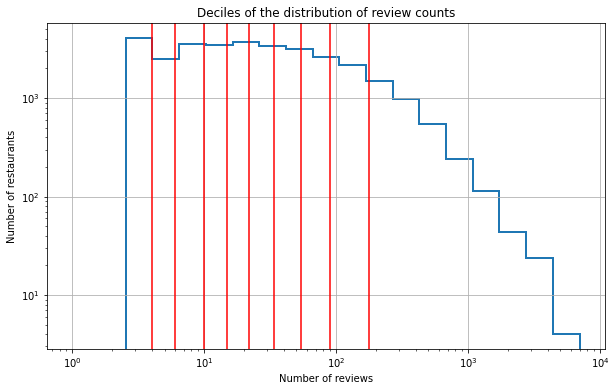

In [34]:
plt.figure(figsize=(10,6))
_=plt.hist(restaurantes_train['review_count'].values, 
           bins=np.logspace(0,np.log10(7000),20), 
           histtype='step',
          linewidth=2)
for pos in deciles:
    plt.axvline(pos, color='r')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of reviews')
plt.ylabel('Number of restaurants')
plt.grid()
_=plt.title('Deciles of the distribution of review counts')

Cuantificamos con la función [`numpy digitize`](https://numpy.org/doc/stable/reference/generated/numpy.digitize.html) y evaluamos los resultados

In [36]:
restaurantes_train['decile_review_count'] = np.digitize(restaurantes_train['review_count'].values, 
                                                        deciles)
restaurantes_test['decile_review_count'] = np.digitize(restaurantes_test['review_count'].values,
                                                       deciles)

In [37]:
# Training set observations
X_train_dec = restaurantes_train['decile_review_count'].values.reshape(-1,1) # column vector, 1 feature and many rows
# Training set targets
Y_train = restaurantes_train['stars'].values
# Test set observations
X_test_dec = restaurantes_test['decile_review_count'].values.reshape(-1,1)
# Test set targets
Y_test = restaurantes_test['stars'].values

dec_linear_model = LinearRegression().fit(X_train_dec, Y_train)
print("Score with the training data R^2={0:.4f}".format(dec_linear_model.score(X_train_dec, Y_train)))
print("Score with the test data R^2={0:.4f}".format(dec_linear_model.score(X_test_dec, Y_test)))
print("w0 = {0:.4f}".format(dec_linear_model.intercept_))
print("w1 = {0:.4f}".format(dec_linear_model.coef_[0]))
global_results['linear dec model restaurants'] = dec_linear_model.score(X_test_dec, Y_test)


Score with the training data R^2=0.0319
Score with the test data R^2=0.0358
w0 = 3.2025
w1 = 0.0519


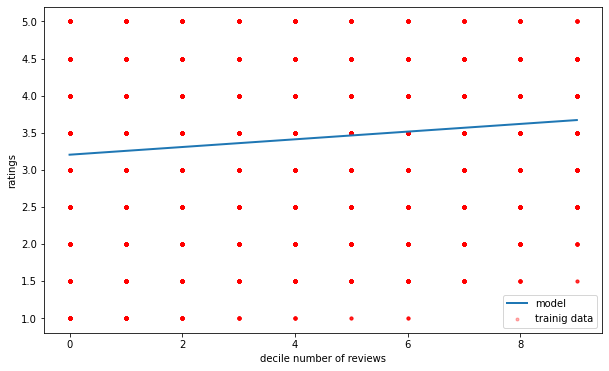

In [38]:
plt.figure(figsize=(10,6))
plt.scatter(X_train_dec, Y_train,marker='.',alpha=0.3,label='trainig data',color='red')
plt.plot([min(X_train_dec), max(X_train_dec)], 
         dec_linear_model.predict(np.array([min(X_train_dec), max(X_train_dec)]).reshape(-1,1)),
        label='model',
        linewidth=2)
plt.xlabel('decile number of reviews')
plt.legend()
_=plt.ylabel('ratings')

In [39]:
pd.Series(global_results)

linear model                    0.002466
linear log model                0.005722
linear model restaurants        0.018828
linear log model restaurants    0.040943
linear dec model restaurants    0.035779
dtype: float64

Vemos cómo la **cuantificación también ayuda a controlar** el problema de que el número de revisiones expanda varios órdenes de magnitud.

## Empleo de otras alternativas como observaciones: proximidad entre negocios

Los restaurantes a veces aparecen en los mismo barrios, y puede que restaurantes que están cerca tengan *ratings* parecidos. Esta relación de proximidad no se puede capturar con el regresor lineal, por lo que vamos a cambiar el modelo por uno basado en vecinos más próximos.

En la base de datos tenemos la **latitud** y la **longitud** de cada establecimiento, y podemos emplear estas dos variables para encontrar los restaurantes que estén más cerca.

Empezamos con [10 vecinos más próximos](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html?highlight=kneighborsregressor#) como modelo de regresión.

In [40]:
from sklearn.neighbors import KNeighborsRegressor
X_train = restaurantes_train.loc[:,['latitude','longitude']].values
Y_train = restaurantes_train['stars'].values
X_test = restaurantes_test.loc[:,['latitude','longitude']].values
Y_test = restaurantes_test['stars'].values

knn_model = KNeighborsRegressor(n_neighbors=10, weights='uniform').fit(X_train, Y_train)
print("Score with the training data R^2={0:.4f}".format(knn_model.score(X_train, Y_train)))
print("Score with the test data R^2={0:.4f}".format(knn_model.score(X_test, Y_test)))


Score with the training data R^2=0.1828
Score with the test data R^2=0.0026


parece que 10 vecinos **sobreajusta**...

Vamos a emplear la funcionalidad [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) de *scikit learn* para aprender el número de vecinos y la función de ponderación.

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
v_k = [1,5,10,25,50,100,250,500] # some values for the number of neighbours
v_weights = ['uniform','distance'] # combination of each neighbour vote
knn_params = {'n_neighbors':v_k,
             'weights':v_weights}

In [43]:
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid=knn_params, cv=5)
grid_knn.fit(X_train, Y_train)
print("Score with the training data R^2={0:.4f}".format(grid_knn.score(X_train, Y_train)))
print("Score with the test data R^2={0:.4f}".format(grid_knn.score(X_test, Y_test)))
print("Hyperparameters choosen with cross-validation")
print(grid_knn.best_params_)
global_results['knn geo'] = grid_knn.score(X_test, Y_test)

Score with the training data R^2=0.0574
Score with the test data R^2=0.0398
Hyperparameters choosen with cross-validation
{'n_neighbors': 100, 'weights': 'uniform'}


Observamos resultados parecidos a los obtenidos con el modelo lineal. Pero si analizamos el detalle de las predicciones

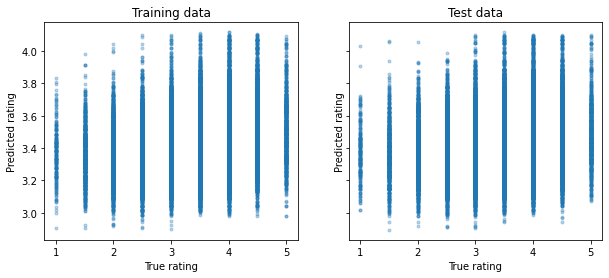

In [44]:
ff,aa = plt.subplots(1,2,sharex=True, sharey=True, figsize=(10,4))
aa[0].scatter(Y_train, 
            grid_knn.predict(X_train),
            marker='.',alpha=0.3,)

aa[0].set_xlabel('True rating')
aa[0].set_ylabel('Predicted rating')
aa[0].set_title('Training data')

aa[1].scatter(Y_test, 
            grid_knn.predict(X_test),
            marker='.',alpha=0.3,)

aa[1].set_xlabel('True rating')
aa[1].set_ylabel('Predicted rating')
_=aa[1].set_title('Test data')

Por lo menos ahora en algunos casos podemos hacer predicciones por debajo de 3.5 estrellas

##  Combinar las dos fuentes de información

Vamos a construir un modelo usando estas dos fuentes de información: el número de revisiones y la localización de cada establecimiento, para predecir el *rating*.

In [45]:
X_train = restaurantes_train.loc[:,['latitude','longitude','review_count']].values
Y_train = restaurantes_train['stars'].values
X_test = restaurantes_test.loc[:,['latitude','longitude','review_count']].values
Y_test = restaurantes_test['stars'].values


Emplearemos como familia de modelos los k vecinos más próximos

In [46]:
grid_knn.fit(X_train, Y_train)

print("Score with the training data R^2={0:.4f}".format(grid_knn.score(X_train, Y_train)))
print("Score with the test data R^2={0:.4f}".format(grid_knn.score(X_test, Y_test)))
print("Hyperparameters choosen with cross-validation")
print(grid_knn.best_params_)

global_results['knn geo + review'] = grid_knn.score(X_test, Y_test)

Score with the training data R^2=0.0651
Score with the test data R^2=0.0689
Hyperparameters choosen with cross-validation
{'n_neighbors': 500, 'weights': 'uniform'}


In [47]:
pd.Series(global_results)

linear model                    0.002466
linear log model                0.005722
linear model restaurants        0.018828
linear log model restaurants    0.040943
linear dec model restaurants    0.035779
knn geo                         0.039750
knn geo + review                0.068866
dtype: float64

Se mejoran sensiblemente las prestaciones del modelo lineal. Vamos a ver si utilizar el número de revisiones en escala logarítmica mejora.



In [48]:
restaurantes_train['log10_review_count'] = restaurantes_train['review_count'].apply(np.log10)
restaurantes_test['log10_review_count'] = restaurantes_test['review_count'].apply(np.log10)

X_train_log = restaurantes_train.loc[:,['latitude','longitude','log10_review_count']].values
X_test_log = restaurantes_test.loc[:,['latitude','longitude','log10_review_count']].values

grid_knn.fit(X_train_log, Y_train)

print("Score with the training data R^2={0:.4f}".format(grid_knn.score(X_train_log, Y_train)))
print("Score with the test data R^2={0:.4f}".format(grid_knn.score(X_test_log, Y_test)))
print("Hyperparameters choosen with cross-validation")
print(grid_knn.best_params_)
global_results['knn geo + log review'] = grid_knn.score(X_test_log, Y_test)

Score with the training data R^2=0.0747
Score with the test data R^2=0.0760
Hyperparameters choosen with cross-validation
{'n_neighbors': 250, 'weights': 'uniform'}


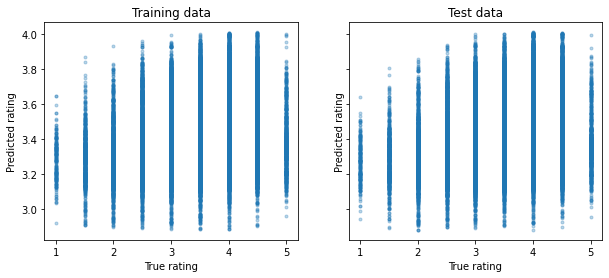

In [49]:
ff,aa = plt.subplots(1,2,sharex=True, sharey=True, figsize=(10,4))
aa[0].scatter(Y_train, 
            grid_knn.predict(X_train_log),
            marker='.',alpha=0.3,)

aa[0].set_xlabel('True rating')
aa[0].set_ylabel('Predicted rating')
aa[0].set_title('Training data')

aa[1].scatter(Y_test, 
            grid_knn.predict(X_test_log),
            marker='.',alpha=0.3,)

aa[1].set_xlabel('True rating')
aa[1].set_ylabel('Predicted rating')
_=aa[1].set_title('Test data')


Alternativamente podemos emplear los deciles de los números de revisiones 

In [50]:
X_train_dec = restaurantes_train.loc[:,['latitude','longitude','decile_review_count']].values
X_test_dec = restaurantes_test.loc[:,['latitude','longitude','decile_review_count']].values

In [51]:
grid_knn.fit(X_train_dec, Y_train)

print("Score with the training data R^2={0:.4f}".format(grid_knn.score(X_train_dec, Y_train)))
print("Score with the test data R^2={0:.4f}".format(grid_knn.score(X_test_dec, Y_test)))
print("Hyperparameters choosen with cross-validation")
print(grid_knn.best_params_)

global_results['knn geo + deciles '] = grid_knn.score(X_test_dec, Y_test)

Score with the training data R^2=0.0865
Score with the test data R^2=0.0777
Hyperparameters choosen with cross-validation
{'n_neighbors': 100, 'weights': 'uniform'}


In [52]:
pd.Series(global_results)

linear model                    0.002466
linear log model                0.005722
linear model restaurants        0.018828
linear log model restaurants    0.040943
linear dec model restaurants    0.035779
knn geo                         0.039750
knn geo + review                0.068866
knn geo + log review            0.075991
knn geo + deciles               0.077709
dtype: float64

Hemos mejorado numéricamente y también en cuanto a la interpretabilidad del modelo. En el caso del logaritmo, es mejor definir con 250 vecinos que con 500... De hecho puede ser que 250 sean demasiados vecinos... 

En el caso de usar los deciles, también se mejora el $R^2$ y solo con 100 vecinos, que puede que sean demasiados para una buena interpretabilidad...

Vamos a ver cuántos restaurantes hay en cada una de las localizaciones

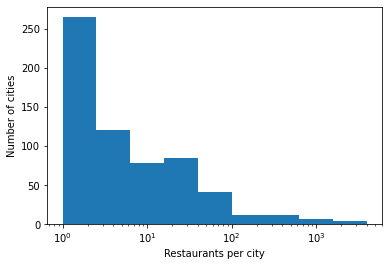

In [53]:
restaurants_per_city_train = restaurantes_train['city'].value_counts()
restaurants_per_city_test = restaurantes_test['city'].value_counts()

plt.figure()
plt.hist(restaurants_per_city_train.values,
        bins=np.logspace(0,np.log10(4000),10))
plt.xscale('log')
plt.xlabel('Restaurants per city')
_=plt.ylabel('Number of cities')

Vemos que hay unas pocas ciudades que tienen más de 200 restaurantes, la mayoría tiene menos de 50, por lo que los vecinos van a estar lejos... 

In [54]:
from sklearn.metrics.pairwise import euclidean_distances

In [55]:
def geographical_distance_to_neighbours(xtrain, 
                                        xtest, 
                                        v_N = [5, 10, 100, 250, 500]):
    n = xtest.shape[0]
    #distance with all the fields
    xtrain_2 = np.sum(xtrain **2, 1) 
    xtest_2 = np.sum(xtest **2, 1)
    #geographical distance (we know it's the first 2 coordinates)
    xtrain_2_g = np.sum(xtrain[:,:2] **2, 1) 
    xtest_2_g = np.sum(xtest[:,:2] **2, 1)


    Distance = np.empty((n, len(v_N)))
    for ii in range(n):
        # find neighbors
        dd = euclidean_distances(xtest[ii,:].reshape(1,-1), 
                                 Y=xtrain, 
                                 Y_norm_squared=xtrain_2,
                                 X_norm_squared=np.array([xtest_2[ii]]).reshape(-1,1))[0]
        sorted_dd = np.argsort(dd)
        for ij, N in enumerate(v_N):
            Distance[ii,ij] = euclidean_distances(xtest[ii,:2].reshape(1,-1), 
                                 Y=xtrain[sorted_dd[N],:2].reshape(1,-1), 
                                 Y_norm_squared=np.array(xtrain_2_g[sorted_dd[N]]).reshape(-1,1),
                                 X_norm_squared=np.array([xtest_2_g[ii]]).reshape(-1,1))[0]
    return Distance

Calculamos la distancia geográfica al vecino 5, 10, 100, 250, 500 si usamos el número de revisiones y lo comparamos con la distancia si usamos el logaritmo del número de revisiones para los 5000 primeros negocios de la lista de test. 

In [56]:
Distance_geographical = geographical_distance_to_neighbours(X_train, 
                                        X_test[:5000,:])
Distance_geographical_log = geographical_distance_to_neighbours(X_train_log, 
                                        X_test_log[:5000,:])

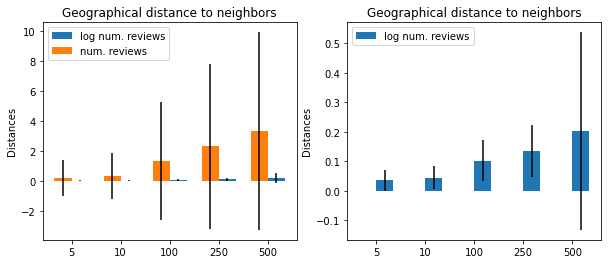

In [57]:
ff,ax = plt.subplots(1,2,sharex=True, figsize=(10,4))
labels = ['5', '10', '100', '250', '500']
l_means = Distance_geographical.mean(0)
r_means = Distance_geographical_log.mean(0)
l_stdv = Distance_geographical.std(0)
r_stdv = Distance_geographical_log.std(0)
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

rects2 = ax[0].bar(x + width/2, r_means, width, yerr=r_stdv, label='log num. reviews')
rects1 = ax[0].bar(x - width/2, l_means, width, yerr=l_stdv, label='num. reviews')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_ylabel('Distances')
ax[0].set_title('Geographical distance to neighbors')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].legend(loc=2)

rects2 = ax[1].bar(x + width/2, r_means, width, yerr=r_stdv, label='log num. reviews')
ax[1].set_ylabel('Distances')
ax[1].set_title('Geographical distance to neighbors')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
_= ax[1].legend(loc=2)

Vemos como efectivamente el peso del número de revisiones influye significativamente en la elección de los vecinos si se usa en logaritmo o no. 

## 3.3 Escalados de las variables

La manera habitual de **controlar el peso relativo de las variables de entrada** en el diseño de los modelos de aprendizaje automático es mediante los escalados. Los escalados más habituales son:
- [**Estandarización** o **normalización**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html): Conseguir que cada variable tenga **media nula y  varianza unidad** dentro del conjunto de entrenamiento

- [**MinMax**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler): Conseguir que cada variable tome valores entre 0 y 1

- [**MaxAbsScaler**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html): Conseguir que cada variable en valor absoluto tome un valor máximo de 1. Este escalado es muy interesante para escenarios donde las observaciones son muy dispersas (bastantes ceros en la matriz de observaciones). Matemáticamente consiste en dividir cada columna por el máximo de su valor absoluto en el conjunto de entrenamiento. Esta operación no recentra las columnas, por lo que se **mantiene la dispersión**. 


Dentro de *scikit learn* podemos automatizar el escalado utilizando la funcionalidad [`Pipeline`](https://scikit-learn.org/stable/modules/classes.html?highlight=pipeline#module-sklearn.pipeline).

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

In [58]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [59]:
# Pipeline definition. List with all the stages of the pipeline
knn_pipe = Pipeline([('scaler', MinMaxScaler()), ('regressor',KNeighborsRegressor())])
# Dictionary with hyperparameters for all the stages of the pipeline, 
# that will be tuned with crossvalidation
params_pipe = {'regressor__n_neighbors':v_k,
             'regressor__weights':v_weights,
              'scaler':[MinMaxScaler(), StandardScaler(),'passthrough']}
# 'passthrough' means skip this stage. 
# This way we can estimate with crossvalidation if scaling was a good idea or not

In [60]:
# set up the grid to optimize the hyperparameters and train the pipeline stages
grid_pipe = GridSearchCV(knn_pipe, param_grid= params_pipe, cv=5)
grid_pipe.fit(X_train, Y_train)
print("Score with the training data R^2={0:.4f}".format(grid_pipe.score(X_train, Y_train)))
print("Score with the test data R^2={0:.4f}".format(grid_pipe.score(X_test, Y_test)))
print("Hyperparameters choosen with cross-validation")
print(grid_pipe.best_params_)

global_results['knn + scale geo + review'] = grid_pipe.score(X_test, Y_test)

Score with the training data R^2=0.9977
Score with the test data R^2=0.0784
Hyperparameters choosen with cross-validation
{'regressor__n_neighbors': 250, 'regressor__weights': 'distance', 'scaler': MinMaxScaler()}


También podemos probar con los conteos de revisiones en logaritmico

In [61]:
grid_pipe_log = GridSearchCV(knn_pipe, param_grid= params_pipe, cv=5)
grid_pipe_log.fit(X_train_log, Y_train)
print("Score with the training data R^2={0:.4f}".format(grid_pipe_log.score(X_train_log, Y_train)))
print("Score with the test data R^2={0:.4f}".format(grid_pipe_log.score(X_test_log, Y_test)))
print("Hyperparameters choosen with cross-validation")
print(grid_pipe_log.best_params_)
global_results['knn + scale geo + log review'] = grid_pipe_log.score(X_test_log, Y_test)


Score with the training data R^2=0.0747
Score with the test data R^2=0.0760
Hyperparameters choosen with cross-validation
{'regressor__n_neighbors': 250, 'regressor__weights': 'uniform', 'scaler': 'passthrough'}


O con los deciles

In [62]:
# set up the grid to optimize the hyperparameters and train the pipeline stages
grid_pipe_dec = GridSearchCV(knn_pipe, param_grid= params_pipe, cv=5)
grid_pipe_dec.fit(X_train_dec, Y_train)
print("Score with the training data R^2={0:.4f}".format(grid_pipe_dec.score(X_train_dec, Y_train)))
print("Score with the test data R^2={0:.4f}".format(grid_pipe_dec.score(X_test_dec, Y_test)))
print("Hyperparameters choosen with cross-validation")
print(grid_pipe_dec.best_params_)

global_results['knn + scale geo + deciles'] = grid_pipe_dec.score(X_test_dec, Y_test)

Score with the training data R^2=0.0865
Score with the test data R^2=0.0777
Hyperparameters choosen with cross-validation
{'regressor__n_neighbors': 100, 'regressor__weights': 'uniform', 'scaler': 'passthrough'}


Vamos a comprobar cómo los escalados controlan el peso de cada variable en el cálculo de las distancias.

In [63]:
# norm of the two geographical coordinates in the original data
geo_norm_Xtest = np.linalg.norm(X_test[:,:2],axis=1)
# Number of reviews in the test set, original data
count_xtest = X_test[:,2]
# Logarithm of the number of reviews in the test set, original data
count_log_xtest = X_test_log[:,2]

# Decile of the number of reviews in the test set, original data
count_dec_xtest = X_test_dec[:,2]

# Learn an Standard Scaler with the training data, and the number of reviews as count
std_sca = StandardScaler().fit(X_train)
# scale the test set data
xtest_std = std_sca.transform(X_test)
# norm of the two geographical coordinates after being standard-scaled
std_norm_Xtest = np.linalg.norm(xtest_std[:,:2],axis=1)
# Number of reviews in the test set after being standard-scaled
count_std_xtest = np.absolute(xtest_std[:,2])

# Learn an MinMax Scaler with the training data, and the number of reviews as count
mm_sca = MinMaxScaler().fit(X_train)
# scale the test set data
xtest_mm = mm_sca.transform(X_test)
# norm of the two geographical coordinates after being MinMax-scaled
mm_norm_Xtest = np.linalg.norm(xtest_mm[:,:2],axis=1)
# Number of reviews in the test set after being MinMax-scaled
count_mm_xtest = np.absolute(xtest_mm[:,2])

# Learn an Standard Scaler with the training data, and the number of reviews as log
log_std_sca = StandardScaler().fit(X_train_log)
# scale the test set data
log_xtest_std = log_std_sca.transform(X_test_log)
# norm of the two geographical coordinates after being standard-scaled
log_std_norm_Xtest = np.linalg.norm(log_xtest_std[:,:2],axis=1)
# Number of reviews in the test set after being standard-scaled
log_count_std_xtest = np.absolute(log_xtest_std[:,2])

# Learn an MinMax Scaler with the training data, and the number of reviews as count
log_mm_sca = MinMaxScaler().fit(X_train_log)
# scale the test set data
log_xtest_mm = log_mm_sca.transform(X_test_log)
# norm of the two geographical coordinates after being MinMax-scaled
log_mm_norm_Xtest = np.linalg.norm(log_xtest_mm[:,:2],axis=1)
# Number of reviews in the test set after being MinMax-scaled
log_count_mm_xtest = np.absolute(log_xtest_mm[:,2])



# Learn an Standard Scaler with the training data, and the number of reviews as log
dec_std_sca = StandardScaler().fit(X_train_dec)
# scale the test set data
dec_xtest_std = dec_std_sca.transform(X_test_dec)
# norm of the two geographical coordinates after being standard-scaled
dec_std_norm_Xtest = np.linalg.norm(dec_xtest_std[:,:2],axis=1)
# Number of reviews in the test set after being standard-scaled
dec_count_std_xtest = np.absolute(dec_xtest_std[:,2])

# Learn an MinMax Scaler with the training data, and the number of reviews as count
dec_mm_sca = MinMaxScaler().fit(X_train_dec)
# scale the test set data
dec_xtest_mm = dec_mm_sca.transform(X_test_dec)
# norm of the two geographical coordinates after being MinMax-scaled
dec_mm_norm_Xtest = np.linalg.norm(dec_xtest_mm[:,:2],axis=1)
# Number of reviews in the test set after being MinMax-scaled
dec_count_mm_xtest = np.absolute(dec_xtest_mm[:,2])


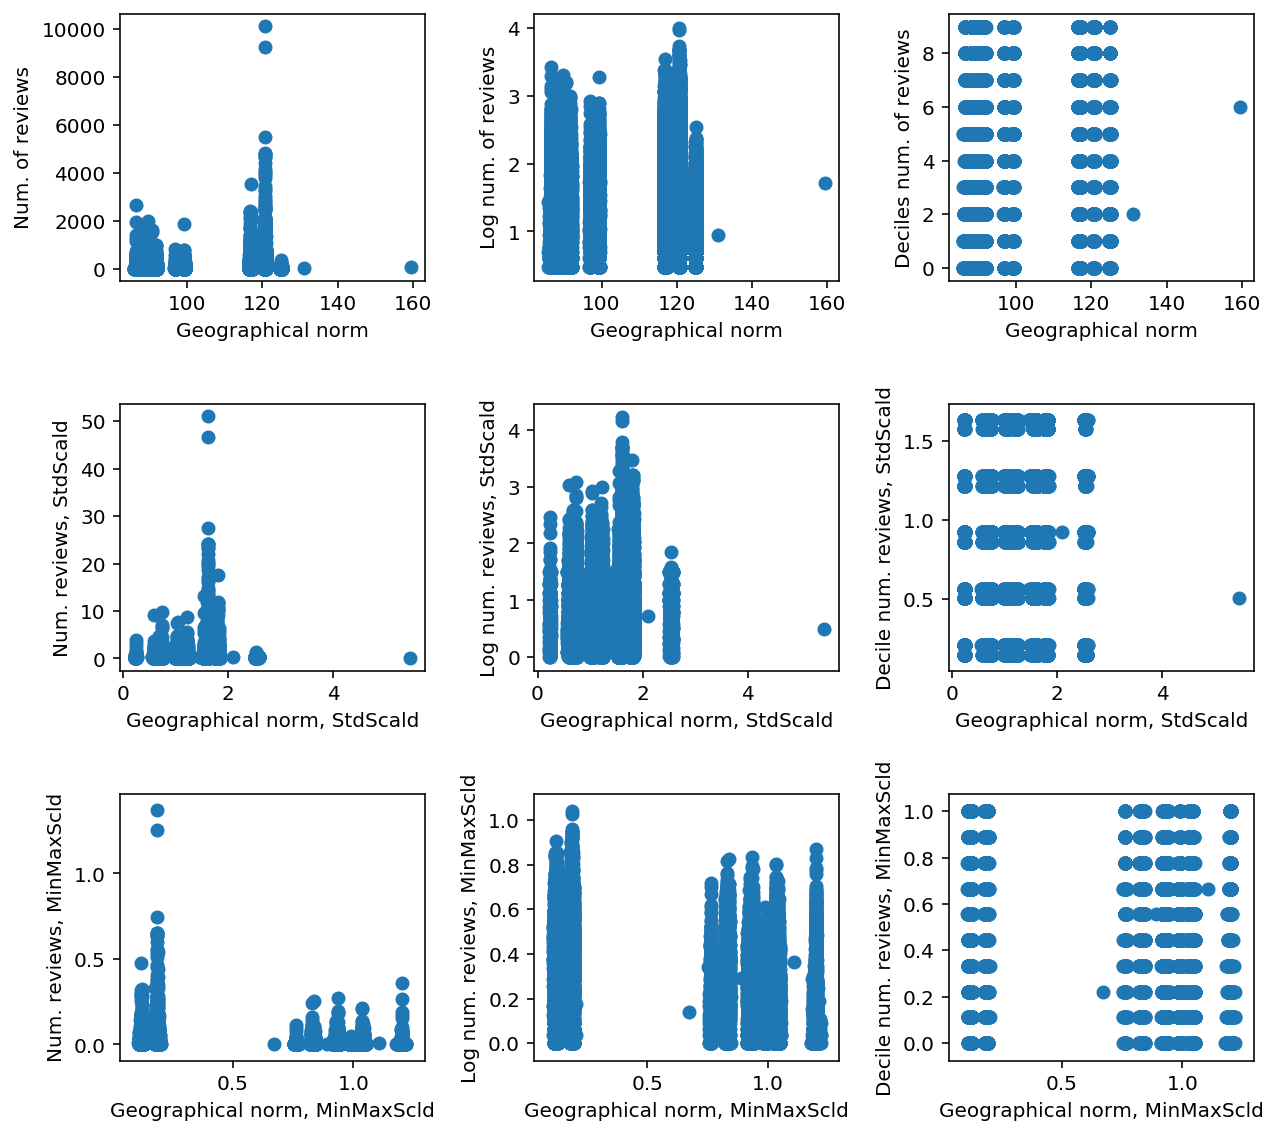

In [62]:
ff,aa = plt.subplots(3,3,figsize=(9,8))
aa[0][0].scatter(geo_norm_Xtest,count_xtest)
aa[0][0].set_xlabel('Geographical norm')
aa[0][0].set_ylabel('Num. of reviews')

aa[0][1].scatter(geo_norm_Xtest,count_log_xtest)
aa[0][1].set_xlabel('Geographical norm')
aa[0][1].set_ylabel('Log num. of reviews')

aa[0][2].scatter(geo_norm_Xtest,count_dec_xtest)
aa[0][2].set_xlabel('Geographical norm')
aa[0][2].set_ylabel('Deciles num. of reviews')

aa[1][0].scatter(std_norm_Xtest,count_std_xtest)
aa[1][0].set_xlabel('Geographical norm, StdScald')
aa[1][0].set_ylabel('Num. reviews, StdScald')

aa[2][0].scatter(mm_norm_Xtest,count_mm_xtest)
aa[2][0].set_xlabel('Geographical norm, MinMaxScld')
aa[2][0].set_ylabel('Num. reviews, MinMaxScld')


aa[1][1].scatter(log_std_norm_Xtest,log_count_std_xtest)
aa[1][1].set_xlabel('Geographical norm, StdScald')
aa[1][1].set_ylabel('Log num. reviews, StdScald')

aa[2][1].scatter(log_mm_norm_Xtest,log_count_mm_xtest)
aa[2][1].set_xlabel('Geographical norm, MinMaxScld')
aa[2][1].set_ylabel('Log num. reviews, MinMaxScld')

aa[1][2].scatter(dec_std_norm_Xtest,dec_count_std_xtest)
aa[1][2].set_xlabel('Geographical norm, StdScald')
aa[1][2].set_ylabel('Decile num. reviews, StdScald')

aa[2][2].scatter(dec_mm_norm_Xtest,dec_count_mm_xtest)
aa[2][2].set_xlabel('Geographical norm, MinMaxScld')
aa[2][2].set_ylabel('Decile num. reviews, MinMaxScld')

ff.tight_layout()

## Introducimos otra fuente alternativa de información: rango de precios

Podemos completar el modelo con otra variable continua, que es el rango de precios de los restaurantes. Para extraer este valor tenemos que procesar el diccionario del campo `attributes`. La siguiente función precisamente explora el campo `attributes` y recupera uno de los atributos


In [64]:
def get_attribute(df, attribute_name):
    att_series = pd.Series('',index = df.index) # to store result and return.
    # the attributes are strings, therefore we initialize with empty strings
    # dataframe just with field attributes. This field is a dictionary
    attribute_in_df = df['attributes'].dropna()
    indice = attribute_in_df.index
    # find out which rows do have the searched attribute
    indice_with_value = indice[attribute_in_df.apply(lambda x: attribute_name in x.keys() and x[attribute_name] is not None).values]
    # copy the value of the attribute in the series that will be returned, 
    # but just in the rows in which the attribute was present 
    att_series.loc[indice_with_value] = attribute_in_df.loc[indice_with_value].apply(lambda x:x[attribute_name])
    return att_series

In [67]:
restaurantes_train['price_range'] = get_attribute(restaurantes_train, 'RestaurantsPriceRange2')
restaurantes_test['price_range'] = get_attribute(restaurantes_test, 'RestaurantsPriceRange2')


Comprobamos los valores presentes en el rango de precios

In [68]:
restaurantes_train['price_range'].value_counts()

2       14403
1       11159
         4921
3        1434
4         262
None       22
Name: price_range, dtype: int64

Tenemos dos valores para rango de precios desconocidos, una cadena vacía, y la cadena "None", más 4 rangos de 1 a 4. Hasta que veamos el módulo de imputación vamos a adoptar la solución fácil que consiste en descartar las filas que no tienen rango de precios.

In [69]:
restaurantes_test['price_range'] = restaurantes_test['price_range'].apply(lambda x:'' if x == 'None' else x)
restaurantes_train['price_range'] = restaurantes_train['price_range'].apply(lambda x:'' if x =='None' else x)
restaurantes_train['price_range'].value_counts()

2    14403
1    11159
      4943
3     1434
4      262
Name: price_range, dtype: int64

Ahora transformamos a valores enteros, y descartamos las cadenas vacías

In [70]:
restaurantes_test['price_range'] = restaurantes_test['price_range'].apply(lambda x: int(x) if x != '' else None)
restaurantes_train['price_range'] = restaurantes_train['price_range'].apply(lambda x:int(x) if x !='' else None)
restaurantes_train['price_range'].value_counts()

2.0    14403
1.0    11159
3.0     1434
4.0      262
Name: price_range, dtype: int64

In [71]:
columns = ['latitude','longitude','price_range','review_count','stars']
X_train = restaurantes_train.loc[:,columns].dropna().values[:,:-1]
Y_train = restaurantes_train.loc[:,columns].dropna().values[:,-1]
X_test = restaurantes_test.loc[:,columns].dropna().values[:,:-1]
Y_test = restaurantes_test.loc[:,columns].dropna().values[:,-1]


In [72]:
grid_pipe = GridSearchCV(knn_pipe, param_grid= params_pipe, cv=5)
grid_pipe.fit(X_train, Y_train)
print("Score with the training data R^2={0:.4f}".format(grid_pipe.score(X_train, Y_train)))
print("Score with the test data R^2={0:.4f}".format(grid_pipe.score(X_test, Y_test)))
print("Hyperparameters choosen with cross-validation")
print(grid_pipe.best_params_)
global_results['knn + scale geo +  review + price_range'] = grid_pipe.score(X_test, Y_test)



Score with the training data R^2=0.1427
Score with the test data R^2=0.1135
Hyperparameters choosen with cross-validation
{'regressor__n_neighbors': 50, 'regressor__weights': 'uniform', 'scaler': MinMaxScaler()}


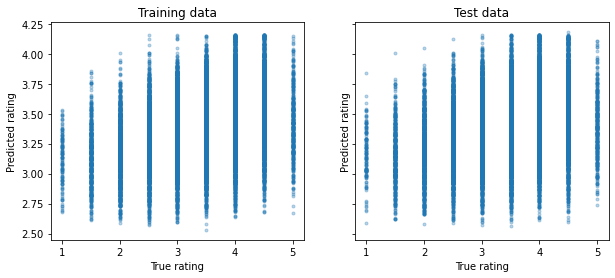

In [73]:
ff,aa = plt.subplots(1,2,sharex=True, sharey=True, figsize=(10,4))
aa[0].scatter(Y_train, 
            grid_pipe.predict(X_train),
            marker='.',alpha=0.3,)

aa[0].set_xlabel('True rating')
aa[0].set_ylabel('Predicted rating')
aa[0].set_title('Training data')

aa[1].scatter(Y_test, 
            grid_pipe.predict(X_test),
            marker='.',alpha=0.3,)

aa[1].set_xlabel('True rating')
aa[1].set_ylabel('Predicted rating')
_=aa[1].set_title('Test data')


Usando los logs

In [74]:
columns = ['latitude','longitude','price_range','log10_review_count','stars']
X_train_log = restaurantes_train.loc[:,columns].dropna().values[:,:-1]
Y_train = restaurantes_train.loc[:,columns].dropna().values[:,-1]
X_test_log = restaurantes_test.loc[:,columns].dropna().values[:,:-1]
Y_test = restaurantes_test.loc[:,columns].dropna().values[:,-1]


In [75]:
# set up the grid to optimize the hyperparameters and train the pipeline stages
grid_pipe = GridSearchCV(knn_pipe, param_grid= params_pipe, cv=5)
grid_pipe.fit(X_train_log, Y_train)
print("Score with the training data R^2={0:.4f}".format(grid_pipe.score(X_train_log, Y_train)))
print("Score with the test data R^2={0:.4f}".format(grid_pipe.score(X_test_log, Y_test)))
print("Hyperparameters choosen with cross-validation")
print(grid_pipe.best_params_)
global_results['knn + scale geo +  log review + price_range'] = grid_pipe.score(X_test_log, Y_test)


Score with the training data R^2=0.1234
Score with the test data R^2=0.1132
Hyperparameters choosen with cross-validation
{'regressor__n_neighbors': 100, 'regressor__weights': 'uniform', 'scaler': 'passthrough'}


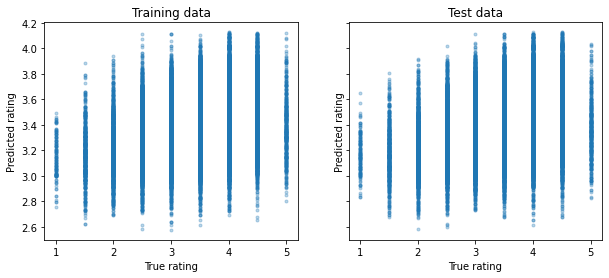

In [76]:
ff,aa = plt.subplots(1,2,sharex=True, sharey=True, figsize=(10,4))
aa[0].scatter(Y_train, 
            grid_pipe.predict(X_train_log),
            marker='.',alpha=0.3,)

aa[0].set_xlabel('True rating')
aa[0].set_ylabel('Predicted rating')
aa[0].set_title('Training data')

aa[1].scatter(Y_test, 
            grid_pipe.predict(X_test_log),
            marker='.',alpha=0.3,)

aa[1].set_xlabel('True rating')
aa[1].set_ylabel('Predicted rating')
_=aa[1].set_title('Test data')

##  Recapitulación
Vamos a ver la evolución de las prestaciones de todos los modelos que hemos entrenado hasta ahora

In [77]:
pd.Series(global_results)

linear model                                   0.002466
linear log model                               0.005722
linear model restaurants                       0.018828
linear log model restaurants                   0.040943
linear dec model restaurants                   0.035779
knn geo                                        0.039750
knn geo + review                               0.068866
knn geo + log review                           0.075991
knn geo + deciles                              0.077709
knn + scale geo + review                       0.078354
knn + scale geo + log review                   0.075991
knn + scale geo + deciles                      0.077709
knn + scale geo +  review + price_range        0.113534
knn + scale geo +  log review + price_range    0.113230
dtype: float64

## 3.4 Transformaciones de variable

Además de los escalados, las discretizaciones y de la transformación logarítmica pueden generalizarse a otras transformaciones que pueden facilitar la tarea a los modelos.

### 3.4.1 Transformación de histograma

Otra transformación que se puede es cambiar la distribución de las variables continuas por una uniforme o por una Gaussiana mediante [`sklearn.preprocessing.quantile_transform`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.quantile_transform.html#sklearn.preprocessing.quantile_transform). 

La transformación a **uniforme** tiende a separar los valores más frecuentes de esa variable y a concentrar los menos frecuentes, con lo que contribuye a reducir el impacto de *outliers*. Como es una transformación **no lineal**, se pueden distorsionar correlaciones lineales entre variables.

La transformación a **Gaussiana** tiende a concentrar los valores en torno a su media.

En el caso de los conteos de revisiones, estas transformaciones lograrían el siguente efecto. Merece la pena comparar los histogramas producidos por estas transformaciones de cuantil con los histogramas después de los escalados.


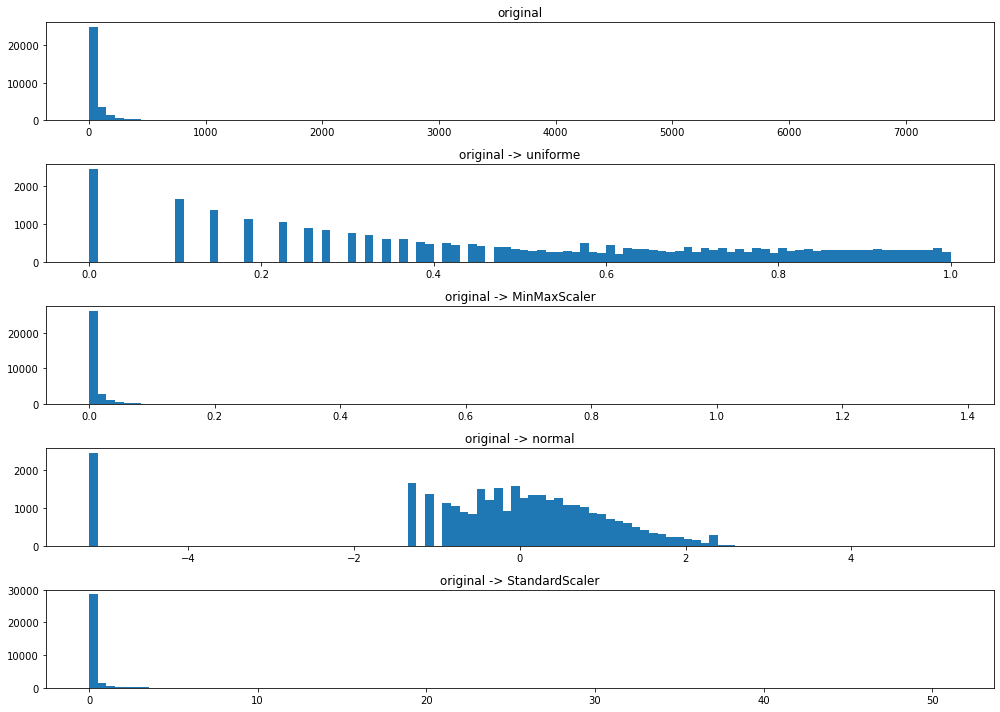

In [78]:
from sklearn.preprocessing import quantile_transform

fx, ax = plt.subplots(5,1, figsize=(14,10))
nbins = 100

xjj = restaurantes_train['review_count'].values
ax[0].hist(xjj,nbins)
ax[0].set_title('original')
xjj_u = quantile_transform(xjj.reshape(-1,1), n_quantiles=nbins, random_state=42, copy=True)
ax[1].hist(xjj_u, nbins)
ax[1].set_title('original -> uniforme')

ax[2].hist(count_mm_xtest, nbins)
ax[2].set_title('original -> MinMaxScaler')

xjj_n = quantile_transform(xjj.reshape(-1,1), n_quantiles=nbins, random_state=42, copy=True, output_distribution='normal')
ax[3].hist(xjj_n, nbins)
ax[3].set_title('original -> normal')

ax[4].hist(count_std_xtest, nbins)
ax[4].set_title('original -> StandardScaler')

fx.tight_layout()

### 3.4.2 Transformación Box-Cox

Otra transformación no lineal que combina raíces (estabilizadores de varianza) con logaritmos

$$
y(x) = \left \{ \begin{array}{ll} \frac{x^\alpha -1}{\alpha} & \mbox{if } \alpha \ne 0 \\ \log(x) & \mbox{if } \alpha  0 \end{array}\right.
$$

Solo vale para variables **estrictamente positivas**. Valores de $\alpha>1$ comprimen los valores pequeños de $x$ y expanden los valores grandes; valores de $\alpha<1$ comprimen los valores grandes de $x$ y expanden los pequeños

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

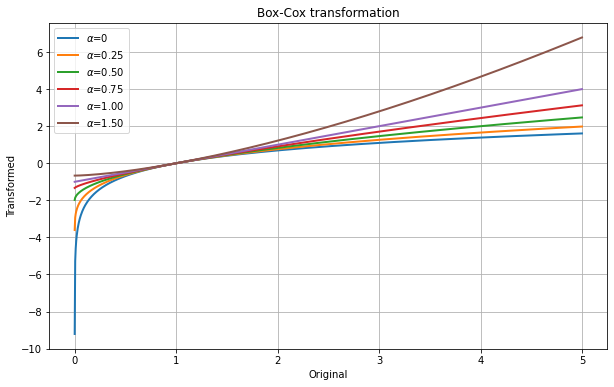

In [79]:
x = np.linspace(1e-4,5,1000)

v_a = np.array([.25, .5, .75, 1, 1.5])
ff,ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(x, np.log(x), label="$\\alpha$=0", linewidth=2)
for aa in v_a:
    ax.plot(x, (x**aa-1)/aa, label="$\\alpha$={0:.2f}".format(aa), linewidth=2)
ax.legend()
ax.grid()
ax.set_xlabel('Original')
ax.set_ylabel('Transformed')
_=ax.set_title('Box-Cox transformation')


La transformación [Box-Cox](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html) está disponible en *scipy stats*

In [80]:
from scipy import stats # statistical utilities

In [81]:
y_bc, bc_params = stats.boxcox(restaurantes_train['review_count'].values)
print(bc_params)

-0.13617380880090577


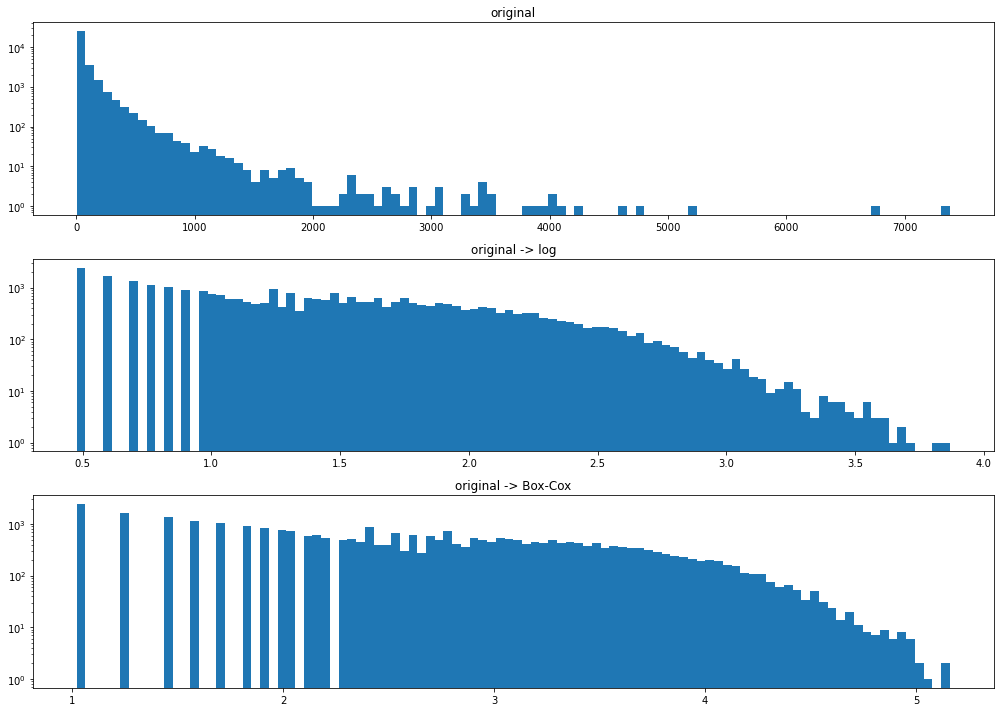

In [82]:
fx, ax = plt.subplots(3,1, figsize=(14,10))
nbins = 100
xjj = restaurantes_train['review_count'].values
ax[0].hist(xjj,nbins)
ax[0].set_title('original')
ax[0].set_yscale('log')

xjj_l = restaurantes_train['log10_review_count'].values
ax[1].hist(xjj_l, nbins)
ax[1].set_title('original -> log')
ax[1].set_yscale('log')

ax[2].hist(y_bc, nbins)
ax[2].set_title('original -> Box-Cox')
ax[2].set_yscale('log')

fx.tight_layout()

# 3.5 Combinaciones de Características

Las transformaciones y escalados que hemos revisado hasta ahora afectan a cada variable de modo **individual**, es decir, que el resultado de la transformación es independiente de lo que pase o deje de pasar con las otras características. 

En general, hay patrones que aparencen solo bajo **combinaciones conjuntas** de varias variables a la vez.

En el caso de la predicción de los ratings estas interacciones podrían patrones que aparezcan sólo si de dan combinaciones de rangos de variables del tipo:

- Si el número de revisiones es alto **y además** el rango de precios es bajo
- Si el número de reviviones es bajo **y además** el rango de precios es bajo

La primera interacción se puede capturar con una **característica** que sea **el cociente** entre el número de revisiones y el rango de precios mientras que la segunda puede capturarse con **el producto** de ambas magnitudes.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html


In [83]:
restaurantes_test['product']=restaurantes_test.loc[:,['price_range','log10_review_count']].apply(lambda x:x[0]*x[1],axis=1)
restaurantes_test['ratio']=restaurantes_test.loc[:,['price_range','log10_review_count']].apply(lambda x:x[1]/x[0],axis=1)
restaurantes_train['ratio']=restaurantes_train.loc[:,['price_range','log10_review_count']].apply(lambda x:x[1]/x[0],axis=1)
restaurantes_train['product']=restaurantes_train.loc[:,['price_range','log10_review_count']].apply(lambda x:x[0]*x[1],axis=1)


In [84]:
columns = ['latitude','longitude','price_range','log10_review_count','product','ratio','stars']
X_train_extended = restaurantes_train.loc[:,columns].dropna().values[:,:-1]
Y_train = restaurantes_train.loc[:,columns].dropna().values[:,-1]
X_test_extended = restaurantes_test.loc[:,columns].dropna().values[:,:-1]
Y_test = restaurantes_test.loc[:,columns].dropna().values[:,-1]


In [85]:
# set up the grid to optimize the hyperparameters and train the pipeline stages
grid_pipe = GridSearchCV(knn_pipe, param_grid= params_pipe, cv=5)
grid_pipe.fit(X_train_extended, Y_train)
print("Score with the training data R^2={0:.4f}".format(grid_pipe.score(X_train_extended, Y_train)))
print("Score with the test data R^2={0:.4f}".format(grid_pipe.score(X_test_extended, Y_test)))
print("Hyperparameters choosen with cross-validation")
print(grid_pipe.best_params_)
global_results['knn + ratios'] = grid_pipe.score(X_test_extended, Y_test)


Score with the training data R^2=0.1084
Score with the test data R^2=0.1101
Hyperparameters choosen with cross-validation
{'regressor__n_neighbors': 250, 'regressor__weights': 'uniform', 'scaler': MinMaxScaler()}


In [86]:
pd.Series(global_results)

linear model                                   0.002466
linear log model                               0.005722
linear model restaurants                       0.018828
linear log model restaurants                   0.040943
linear dec model restaurants                   0.035779
knn geo                                        0.039750
knn geo + review                               0.068866
knn geo + log review                           0.075991
knn geo + deciles                              0.077709
knn + scale geo + review                       0.078354
knn + scale geo + log review                   0.075991
knn + scale geo + deciles                      0.077709
knn + scale geo +  review + price_range        0.113534
knn + scale geo +  log review + price_range    0.113230
knn + ratios                                   0.110102
dtype: float64

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


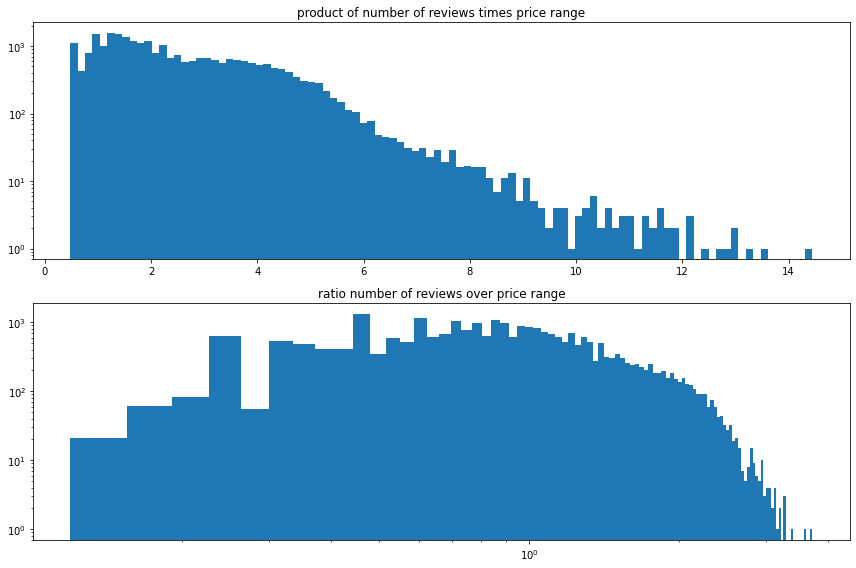

In [87]:
fx, ax = plt.subplots(2,1, figsize=(12,8))
nbins = 100
xjj = restaurantes_train['product'].values
ax[0].hist(xjj,nbins)
ax[0].set_title('product of number of reviews times price range')
ax[0].set_yscale('log')

xjj_l = restaurantes_train['ratio'].values
ax[1].hist(xjj_l, nbins)
ax[1].set_title('ratio number of reviews over price range')
ax[1].set_yscale('log')
ax[1].set_xscale('log')

fx.tight_layout()

In [88]:
columns = ['price_range','decile_review_count','product','ratio','stars']
X_train_extended = restaurantes_train.loc[:,columns].dropna().values[:,:-1]
Y_train = restaurantes_train.loc[:,columns].dropna().values[:,-1]
X_test_extended = restaurantes_test.loc[:,columns].dropna().values[:,:-1]
Y_test = restaurantes_test.loc[:,columns].dropna().values[:,-1]

linear_model_e = Pipeline([('sca',StandardScaler()), ('reg',LinearRegression())]).fit(X_train_extended, Y_train)
print("Score with the training data R^2={0:.4f}".format(linear_model_e.score(X_train_extended, Y_train)))
print("Score with the test data R^2={0:.4f}".format(linear_model_e.score(X_test_extended, Y_test)))
print("w0 = {0:.4f}".format(linear_model_e['reg'].intercept_))
for ii,ff in enumerate(columns[:-1]):
    print("peso {0} = {1:.4f}".format(ff,linear_model_e['reg'].coef_[ii]))
global_results['linear extended model'] = linear_model_e['reg'].score(X_test_extended, Y_test)

Score with the training data R^2=0.0625
Score with the test data R^2=0.0700
w0 = 3.4271
peso price_range = 0.1077
peso decile_review_count = -0.0016
peso product = 0.0996
peso ratio = 0.1331


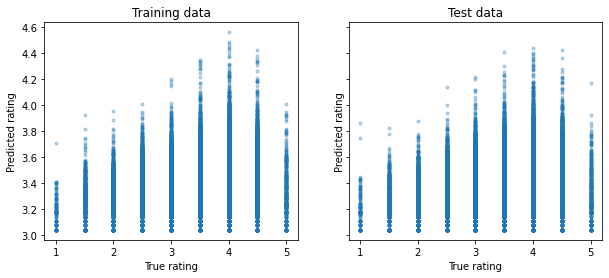

In [89]:
ff,aa = plt.subplots(1,2,sharex=True, sharey=True, figsize=(10,4))
aa[0].scatter(Y_train, 
            linear_model_e.predict(X_train_extended),
            marker='.',alpha=0.3,)

aa[0].set_xlabel('True rating')
aa[0].set_ylabel('Predicted rating')
aa[0].set_title('Training data')

aa[1].scatter(Y_test, 
            linear_model_e.predict(X_test_extended),
            marker='.',alpha=0.3,)

aa[1].set_xlabel('True rating')
aa[1].set_ylabel('Predicted rating')
_=aa[1].set_title('Test data')

En este modelo podemos observar cómo las características resultantes de la interacción de rango de precios y número de revisiones *diluyen* el efecto del número de revisiones (peso significativamente menor en valor absoluto).

### Automatización de la combinación de características

Buscar combinaciones de características en productos y cocientes es relativamente cómodo de automatizar en *scikit learn* con __[`preproccessing.PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)__ . Mediante esta funcionalidad podemos construir **polinomios** combinando las distintas características.

Para construir los **cocientes** podemos previamente **enriquecer** el conjunto de caracteristicas con los **inversos** de las mismas y aplicar la expansión polinómica al conjunto enriquecido. En este sentido hay que tener cuidado con características redundantes como cocientes de variables consigo mismas.

In [92]:
columns = ['price_range','log10_review_count']
for cc in columns:
    restaurantes_train.loc[:, "inv_"+cc] = restaurantes_train.loc[:,cc].apply(lambda x:1/x)
    restaurantes_test.loc[:, "inv_"+cc] = restaurantes_test.loc[:,cc].apply(lambda x:1/x)
    
restaurantes_train.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'decile_review_count',
       'log10_review_count', 'price_range', 'ratio', 'product',
       'inv_price_range', 'inv_log10_review_count'],
      dtype='object')

In [93]:
columns_a = columns + ["inv_" + cc for cc in columns] + ['stars']
print(columns_a)

['price_range', 'log10_review_count', 'inv_price_range', 'inv_log10_review_count', 'stars']


In [94]:
X_train_extended_a = restaurantes_train.loc[:,columns_a].dropna().values[:,:-1]
Y_train = restaurantes_train.loc[:,columns_a].dropna().values[:,-1]
X_test_extended_a = restaurantes_test.loc[:,columns_a].dropna().values[:,:-1]
Y_test = restaurantes_test.loc[:,columns_a].dropna().values[:,-1]
print(X_train_extended_a.shape)

(27258, 4)


In [95]:
from sklearn.preprocessing import PolynomialFeatures

In [96]:
poly = PolynomialFeatures(interaction_only=True, 
                          degree=2,
                         include_bias=False)
X_train_e = poly.fit_transform(X_train_extended_a)
X_test_e = poly.transform(X_test_extended_a)
print(poly.get_feature_names(columns_a))

['price_range', 'log10_review_count', 'inv_price_range', 'inv_log10_review_count', 'price_range log10_review_count', 'price_range inv_price_range', 'price_range inv_log10_review_count', 'log10_review_count inv_price_range', 'log10_review_count inv_log10_review_count', 'inv_price_range inv_log10_review_count']


In [97]:
print(X_train_e.shape)

(27258, 10)


*Quick & dirty hack* para eliminar columnas que son el producto de una variable por su inverso: Eliminar columnas sin varianza

In [98]:
varianzas = np.std(X_train_e, 0)
print(varianzas)
siguen = np.where(varianzas > 1e-6)[0]
X_train_e = X_train_e[:,siguen]
X_test_e = X_test_e[:,siguen]


[6.21690194e-01 5.99942950e-01 2.58761944e-01 4.15990740e-01
 1.55626185e+00 0.00000000e+00 8.45089560e-01 5.05322714e-01
 4.27154519e-17 4.04007036e-01]


In [99]:
linear_model_ee = Pipeline([('sca',StandardScaler()), ('reg',LinearRegression())]).fit(X_train_e, Y_train)
print("Score with the training data R^2={0:.4f}".format(linear_model_ee.score(X_train_e, Y_train)))
print("Score with the test data R^2={0:.4f}".format(linear_model_ee.score(X_test_e, Y_test)))
print("w0 = {0:.4f}".format(linear_model_ee['reg'].intercept_))
for ii,ff in enumerate(siguen):
    print("peso {0} = {1:.4f}".format(poly.get_feature_names(columns_a)[ff],linear_model_ee['reg'].coef_[ii]))
global_results['linear poly model'] = linear_model_ee['reg'].score(X_test_e, Y_test)

Score with the training data R^2=0.0727
Score with the test data R^2=0.0773
w0 = 3.4271
peso price_range = -0.0516
peso log10_review_count = -0.2481
peso inv_price_range = -0.5514
peso inv_log10_review_count = -0.0824
peso price_range log10_review_count = 0.1819
peso price_range inv_log10_review_count = 0.0004
peso log10_review_count inv_price_range = 0.5180
peso inv_price_range inv_log10_review_count = 0.2872


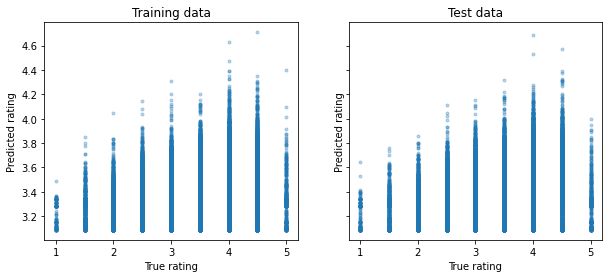

In [101]:
ff,aa = plt.subplots(1,2,sharex=True, sharey=True, figsize=(10,4))
aa[0].scatter(Y_train, 
            linear_model_ee.predict(X_train_e),
            marker='.',alpha=0.3,)

aa[0].set_xlabel('True rating')
aa[0].set_ylabel('Predicted rating')
aa[0].set_title('Training data')

aa[1].scatter(Y_test, 
            linear_model_ee.predict(X_test_e),
            marker='.',alpha=0.3,)

aa[1].set_xlabel('True rating')
aa[1].set_ylabel('Predicted rating')
_=aa[1].set_title('Test data')

La expansión polinómica hay que emplearla con cuidado porque la **explosión combinatoria** del número de características generadas crece exponencialmente con el grado del polinomio. 

Es habitual usar expansiones polinómicas en combinación con los métodos de **selección de características** que vamos a ver en otra sesión de este curso.

# 4. Ingeniería de variables categóricas

Recordamos, una variable categórica representa una etiqueta o una categoría. Por ejemplo, el campo `city` en la base de datos YELP, pero también el campo `postal_code`, el campo `state` o el campo `name`.

Los valores de una variable categórica **no pueden ordenarse**. Aunque algunas variables categóricas vengan expresadas con números, por ejemplo un número de teléfono, o el código postal, **ordenar estos valores carece de sentido**.

El factor que va a determinar la estrategia que emplemos para codificar una variable categórica depende del número de categorías:
- Para números relativamente bajos de categorías podemos usar:
    - *One-hot encoding*
    - *Dumb encoding*
    - *Effect encoding*
- Para números relativamente altos de categorías podemos usar:
    - *Hashing functions*
    - Conteos de bin
    
<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

## Simplificación del problema YELP a ciudades con varios restaurantes

Para emplear variables categóricas vamos a descartar de la base de datos los negocios que estén en ciudades que no tengan muchas entradas en la base de datos

In [102]:
restaurantes_por_ciudad = restaurantes_train['city'].value_counts()

In [103]:
ciudades_con_mas_de_2000 = restaurantes_por_ciudad.loc[restaurantes_por_ciudad>=2000].index
print(ciudades_con_mas_de_2000)

Index(['Toronto', 'Las Vegas', 'Montréal', 'Phoenix'], dtype='object')


In [104]:
restaurantes_2000_train = restaurantes_train.loc[restaurantes_train['city'].isin(ciudades_con_mas_de_2000)]
restaurantes_2000_test = restaurantes_test.loc[restaurantes_test['city'].isin(ciudades_con_mas_de_2000)]

## 4.1 Transformación One-Hot Encoding


Consideremos una variable categórica con $M$ posibles valores, por ejemplo la variable `grupo` que pueda tomar 3 valores `A`, `B` o `C`. [**One-Hot encoding**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder) transforma cada variable categórica en $M$ variables binarias (solo toman el valor 1 o 0) que se organizan así:
Si una observación tiene el valor $m$ en la variable categórica, todas las variables binarias toman el valor 0, excepto la $m$-ésima, que toma el valor 1.

En el ejemplo, la variable `grupo` se transformaría en 3 variables, [`grupo_A`, `grupo_B` y `grupo_C`] que codificarían las observaciones del siguiente modo:
- `grupo`=`A` $\rightarrow$ [`grupo_A`=`1`, `grupo_B`=`0`, `grupo_C`=`0`]
- `grupo`=`B` $\rightarrow$ [`grupo_A`=`0`, `grupo_B`=`1`, `grupo_C`=`0`]
- `grupo`=`C` $\rightarrow$ [`grupo_A`=`0`, `grupo_B`=`0`, `grupo_C`=`1`]

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

In [105]:
from sklearn.preprocessing import OneHotEncoder

In [106]:
columns = ['city','stars']
X_train_city = restaurantes_2000_train.loc[:,columns].dropna().values[:,:-1].reshape(-1,1)
Y_train = restaurantes_2000_train.loc[:,columns].dropna().values[:,-1]
X_test_city = restaurantes_2000_test.loc[:,columns].dropna().values[:,:-1].reshape(-1,1)
Y_test = restaurantes_2000_test.loc[:,columns].dropna().values[:,-1]

In [107]:
ohe = OneHotEncoder(sparse = False)

In [108]:
X_train_city_ohe = ohe.fit_transform(X_train_city)
X_test_city_ohe = ohe.transform(X_test_city)
print(ohe.categories_)

[array(['Las Vegas', 'Montréal', 'Phoenix', 'Toronto'], dtype=object)]


In [109]:
print(pd.DataFrame(X_train_city_ohe, columns=ohe.categories_[0]))

       Las Vegas  Montréal  Phoenix  Toronto
0            0.0       0.0      0.0      1.0
1            1.0       0.0      0.0      0.0
2            1.0       0.0      0.0      0.0
3            0.0       0.0      0.0      1.0
4            1.0       0.0      0.0      0.0
...          ...       ...      ...      ...
12030        0.0       0.0      1.0      0.0
12031        0.0       1.0      0.0      0.0
12032        0.0       0.0      0.0      1.0
12033        0.0       0.0      0.0      1.0
12034        0.0       0.0      0.0      1.0

[12035 rows x 4 columns]


*One hot encoding* es bastante intuitivo pero tiene **problemas de colinealidades** si usamos métodos lineales porque las columnas que genera no son linealmente independientes, ya que la suma de todos los elementos de cada fila da 1. Para aprender un modelo lineal le podemos sumar ruido a las observaciones para eliminar la colinealidad

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

In [110]:
lin_ohe = LinearRegression().fit(X_train_city_ohe + 1e-1*np.random.randn(X_train_city_ohe.shape[0],4), Y_train)
print("pesos")
print(lin_ohe.coef_)

pesos
[-0.07555783  0.10002199 -0.10045445 -0.11688904]


In [111]:
print("w_0")
print(lin_ohe.intercept_)

w_0
3.572790141861653


In [112]:
print("rating promedio")
print(Y_train.mean())

rating promedio
3.5086414624013296


Salvo temas de precisión, el valor del término constante del modelo debería más o menos apuntar al valor medio del número de *ratings*, y cada peso captura la diferencia entre la ciudad en cuestión y el valor medio para todas las ciudades.

In [113]:
print("rating promedio de cada categoría")
X_train_city_ohe.T.dot(Y_train)/sum(X_train_city_ohe,0)

rating promedio de cada categoría


array([3.496166950596252, 3.6829675572519083, 3.4689334637964775,
       3.453693116853419], dtype=object)

In [114]:
print("w0 + w_i para cada categoria x_i")
print(lin_ohe.intercept_ + lin_ohe.coef_ )

w0 + w_i para cada categoria x_i
[3.49723231 3.67281213 3.47233569 3.4559011 ]


## 4.2. *Dummy coding*

Corrige el defecto de colinealidad de *one-hot encoding* eliminando una de las características. Esta característica se corresponde con una categoría que se denomina **categoría de referencia** y que se representa con ceros en todas las características correspondientes a las demás categorías.

En *scikit learn* se emplea la misma clase que para *one-hot encoding* pero con el parámetro `drop` elegimos la categoría de referencia.

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

In [115]:
dummy = OneHotEncoder(sparse = False,
                     drop='first')
X_train_city_dummy = dummy.fit_transform(X_train_city)
X_test_city_dummy = dummy.transform(X_test_city)
print(dummy.categories_)
print(dummy.drop_idx_)

[array(['Las Vegas', 'Montréal', 'Phoenix', 'Toronto'], dtype=object)]
[0]


In [116]:
print(pd.DataFrame(X_train_city_dummy, columns=dummy.categories_[0][1:]))

       Montréal  Phoenix  Toronto
0           0.0      0.0      1.0
1           0.0      0.0      0.0
2           0.0      0.0      0.0
3           0.0      0.0      1.0
4           0.0      0.0      0.0
...         ...      ...      ...
12030       0.0      1.0      0.0
12031       1.0      0.0      0.0
12032       0.0      0.0      1.0
12033       0.0      0.0      1.0
12034       0.0      0.0      1.0

[12035 rows x 3 columns]


Podemos comprobar cómo las entradas de "Las Vegas" se corresponden con 3 ceros en la codificación.

El modelo lineal se puede construir sin problemas numéricos, pero la interpretación es un poco distinta a la vista para el caso *one-hot encoding*

In [117]:
lin_dummy = LinearRegression().fit(X_train_city_dummy, Y_train)
print(lin_dummy.coef_)
print(lin_dummy.intercept_)

[ 0.18680061 -0.02723349 -0.04247383]
3.4961669505962525


Ahora el término constante del modelo tiene el *rating* medio para la **categoría de referencia**, en este caso *Las Vegas* y el peso captura la diferencia entre cada categoría y la categoría de referencia.

In [118]:
print("rating promedio de cada categoría no-referencia")
X_train_city_dummy.T.dot(Y_train)/sum(X_train_city_dummy,0)

rating promedio de cada categoría no-referencia


array([3.6829675572519083, 3.4689334637964775, 3.453693116853419],
      dtype=object)

In [119]:
print("w0 + w_i para cada categoria x_i, no de referencia")
print(lin_dummy.intercept_ + lin_dummy.coef_ )

w0 + w_i para cada categoria x_i, no de referencia
[3.68296756 3.46893346 3.45369312]


## 4.3 *Effect coding*

Es muy similar al *dummy coding* pero en este caso la **categoría de referencia** se representa con un $-1$ en todas las características de la codificación.

En *scikit learn* hace falta programar un poco para transformar el *dummy encoding*.

In [120]:
X_train_city_effect = X_train_city_dummy.copy()
positions = np.where(X_train_city_effect.sum(1)==0)[0]
X_train_city_effect[positions,:] = -1

X_test_city_effect = X_test_city_dummy.copy()
positions = np.where(X_test_city_effect.sum(1)==0)[0]
X_test_city_effect[positions,:] = -1



In [121]:
print(pd.DataFrame(X_train_city_effect, columns=dummy.categories_[0][1:]))

       Montréal  Phoenix  Toronto
0           0.0      0.0      1.0
1          -1.0     -1.0     -1.0
2          -1.0     -1.0     -1.0
3           0.0      0.0      1.0
4          -1.0     -1.0     -1.0
...         ...      ...      ...
12030       0.0      1.0      0.0
12031       1.0      0.0      0.0
12032       0.0      0.0      1.0
12033       0.0      0.0      1.0
12034       0.0      0.0      1.0

[12035 rows x 3 columns]


In [122]:
lin_effect = LinearRegression().fit(X_train_city_effect, Y_train)
print(lin_effect.coef_)
print(lin_effect.intercept_)

[ 0.15752729 -0.05650681 -0.07174716]
3.525440272124514


In [123]:
print("El término w_0 compensa la diferencia de las medias de los targets con las medias del modelo")
np.mean(Y_train) - np.mean(X_train_city_effect,0).dot(lin_effect.coef_) 

El término w_0 compensa la diferencia de las medias de los targets con las medias del modelo


3.525440272124514

En un modelo lineal entrenado con *effect coding* el término constante se encarga de **compensar las medias de las observaciones** con la media de los *ratings*, y cada peso captura la diferencia entre cada ciudad (distinta de la categoría de referencia) con la media de todas las categorías.

El efecto de la **categoría de referencia** hay que verlo como la suma de los negativos de los efectos de las demás categorías.

In [124]:
print(X_train_city_ohe[:,0].dot(Y_train)/np.sum(X_train_city_ohe[:,0])) 
print(-np.sum(lin_effect.coef_)+lin_effect.intercept_)

3.496166950596252
3.4961669505962516


## 4.4 Recap
- *One-hot encoding*, *Dummy encoding* y *Effect encoding* son muy parecidos, aplican a casos donde el número de categorías no es muy elevado.

- *One-hot encoding* es redundante, lo que puede dar problemas con modelos lineales, pero por contra facilita la interpretabilidad de otros tipos de modelos porque cada categoría tiene una característica propia.

- *Dummy coding* no es redundante pero dificulta el trabajo cuando hay que gestionar valores perdidos en los datos, ya que el vector con todo ceros (que puede ser habitual cuando hay *missing values*) está codificando la categoría de referencia

- *Dummy coding* codifica el efecto de cada categoría en el modelo referenciado a la categoría de referencia, lo que a veces puede ser complicado de interpretar

- *Effect coding* tampoco es redundante y el efecto de cada categoría (excepto de la de referencia) se codifica con respecto del promedio de todas las categorías. El problema es que la categoría de referencia se codifica con un vector denso, lo que implica mayor necesidad de almacenamiento.

- cuando el número de categorías de la característica es muy grande estas tres técnicas producen resultados difíciles de manejar. Alternativas:
    - *Hashing* de características
    - Conteo de *bins*
    
<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

## 4.5 *Hashing de características*

Una función de *hashing* es una función determinista que mapea un entero sin cota (tan grande como queramos) dentro de un rango de enteros finito $[1,m]$. Dado que el rango de valores de la entrada es potencialmente mucho mayor que el rango de valores de la salida, puede darse el caso de que varias entradas coincidan en la misma salida, lo que se conoce como **colisión**. Un *hashing* uniforme asegura más o menos que cada salida reciba la misma proporción de la entrada.

En nuestro caso vamos a emplear una función *hashing* para codificar una variable categórica con un número grande de categorías. El proceso sigue dos etapas:
1. Codificar cada una de las categorías con un número entero. Tendremos tantos números enteros como categorías
2. Aplicar una función de *hashing* que transforma los enteros que codifican las categorías en un código de $m$ columnas.


<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

Como resultado, cada categoría se transforma en un código de $m$ componentes, que en principio pueden ser densas. En las variantes de *one-hot encoding* el código tiene una longitud igual al número de categorías (menos uno) y con la función de *hashing* reducimos esta longitud de código a un valor de  $m$.

Las funciones de *hashing* se diseñan para preservar estadísticos de los productos escalares originales, de modo que las variables *hasheadas* puedan usarse dentro de modelos lineales.

El precio que se paga por esta reducción de la dimensión es que las $m$ categorías que resultan del *hashing* **no son interpretables** dentro del conocimiento a priori definido por las variables del problema.

Vamos a emplear la funcionalidad de *hashing* de *scikit learn* para codificar los códigos postales de los negocios de la base de YELP.

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

In [125]:
restaurantes_2000_train['postal_code'].head(20)

38253     M4Y 2C6
91752       89102
117007      89135
166325    M1V 1V2
203149      89146
89028       85040
147566      89128
188171      89146
13278       89139
27483     M5B 1R8
200162      85004
134852      89103
159575      89148
52208       89102
166623    H2S 1R1
98821     H4N 3M5
189766    M5S 1X7
6694        89108
43092     H2Y 1Z9
106687    M1S 1V1
Name: postal_code, dtype: object

In [126]:
restaurantes_2000_train['postal_code'].value_counts()

89109      521
89119      240
89102      231
89103      200
89146      182
          ... 
M4W 2L9      1
M4S 2N2      1
M5B 1C9      1
H3L 2T6      1
H3G 1P6      1
Name: postal_code, Length: 3585, dtype: int64

In [127]:
from sklearn.feature_extraction import FeatureHasher 

In [130]:

h =FeatureHasher(n_features=8, # number of columns of the outut
                input_type='string')
f = h.transform(restaurantes_2000_train['postal_code']) # notice you don't need fit


In [131]:
print("Detalle de la salida del hash")
f.toarray()[:20,:]

Detalle de la salida del hash


array([[ 1.,  0.,  1.,  0.,  0., -1.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0., -1.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  2., -1.,  0.,  0.],
       [ 1.,  0.,  1.,  0.,  0., -2.,  0.,  3.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0.],
       [-1., -3.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0., -1.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  1., -1.,  0.,  0.],
       [ 1.,  0.,  1.,  0.,  1., -1., -1.,  0.],
       [-1., -3.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  1., -1.,  0.,  0.],
       [-1., -1.,  0.,  0.,  0., -1.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0., -1.,  0.,  1.],
       [ 1.,  2.,  0.,  0., -1., -2.,  0.,  1.],
       [ 0.,  1.,  1.,  0.,  2.,  0.,  0., -1.],
       [ 2.,  0.,  1.,  0.,  1., -1.,  0.,  0.],
       [ 0., -2.,  0.,  0.,  0., -1.,  0.,  0.],
       [ 1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  1.,  0., -1., -3.,  0.,  1.]])

In [132]:
np.absolute(f.toarray()).sum(0)

array([ 8481., 11741.,  4919.,     0.,  8705., 10818.,  1972.,  6832.])

In [133]:
from sys import getsizeof
print('Pandas size: {0:d} bytes'.format(getsizeof(restaurantes_2000_train['postal_code'])))
print('Hashed version size: {0:d} bytes'.format( getsizeof(f)))

Pandas size: 854203 bytes
Hashed version size: 56 bytes


El *hashing* es muy interesante para el diseño de *pipelines* de automatización procesamiento de datos dentro de aplicaciones *Big Data* por la **significativa compresión del almacenamiento**. Resaltamos la parte de automatización de procesos en el sentido de poca intervención humana  por la pérdida de interpretabilidad.

## 4.6 Conteos de *bins*

En lugar de emplear el valor de la categoría como característica, empleamos **la probabilidad condicional del target bajo ese valor de la característica**. De un modo más general, codificamos en esa característica estadísticos que relacionan el valor del target y el valor (categoría) que toma esa característica.

En el caso de la base de datos de YELP vamos a emplear conteos de bin para codificar las ciudades. Primero lo aplicamos en el subconjunto de negocios de las ciudades con más de 2000 negocios.

Como tenemos una variable target discreta en 10 valores, vamos a codificar cada ciudad con un vector de 9 componentes, cada una de estas componentes la probabilidad de que un establecimiento de esa ciudad obtenga el *rating* correspondiente:

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

$$
\mbox{Las Vegas } \rightarrow \left [ \begin{array}{c} \mbox{Prob}(\mbox{stars}=1|\mbox{city = Las Vegas})\\
\mbox{Prob}(\mbox{stars}=1.5|\mbox{city = Las Vegas}) \\
\mbox{Prob}(\mbox{stars}=2|\mbox{city = Las Vegas}) \\
\mbox{Prob}(\mbox{stars}=2.5|\mbox{city = Las Vegas}) \\
\mbox{Prob}(\mbox{stars}=3|\mbox{city = Las Vegas}) \\
\mbox{Prob}(\mbox{stars}=3.5|\mbox{city = Las Vegas}) \\
\mbox{Prob}(\mbox{stars}=4|\mbox{city = Las Vegas}) \\
\mbox{Prob}(\mbox{stars}=4.5|\mbox{city = Las Vegas}) \\
\mbox{Prob}(\mbox{stars}=5|\mbox{city = Las Vegas}) \\
\end{array}\right ]
$$

Esto generará 9 columnas. Si vamos a emplear un modelo lineal podemos sufrir el mismo problema que con *one-hot encoding* porque las 9 probabilidades condicionales van a sumar 1, es decir, que cualquier columna puede escribirse como una combinación lineal de las otras 8.

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

La siguiente clase python implementa el conteo de *bins*

In [134]:
class bin_counter(object):
    def __init__(self):
        pass
    def fit_transform(self, x, y):
        self.code_book = {}
        N = len(x)
        y_categories = np.unique(y)
        self.d = len(y_categories)
        output = np.empty((N, self.d))
        x_categories = np.unique(x)
        num_x_categories = len(x_categories)
        y_ohe = OneHotEncoder(sparse=False).fit_transform(y.reshape(-1,1))
        for cat in x_categories:
            posi = np.where(x==cat)[0]
            code = np.mean(y_ohe[posi,:],0)
            self.code_book[cat] = code
            output[posi,:] = code
        return output
    def transform(self, x):
        N = len(x)
        output = np.empty((N, self.d))
        x_categories = np.unique(x)
        for cat in x_categories:
            if cat not in self.code_book:
                code = np.array([np.nan]*d)
            else:
                code = self.code_book[cat]
            posi = np.where(x==cat)[0]
            output[posi,:] = code
        return output
    def fit(self, x, y):
        self.code_book = {}
        N = len(x)
        y_categories = np.unique(y)
        self.d = len(y_categories)
        x_categories = np.unique(x)
        num_x_categories = len(x_categories)
        y_ohe = OneHotEncoder(sparse=False).fit_transform(y.reshape(-1,1))
        for cat in x_categories:
            posi = np.where(x==cat)[0]
            code = np.mean(y_ohe[posi,:],0)
            self.code_book[cat] = code
          

In [135]:
x = restaurantes_2000_train['city'].values
y = restaurantes_2000_train['stars'].values


In [136]:
bc = bin_counter()


In [137]:
city_bin_counted_train = bc.fit_transform(restaurantes_2000_train['city'].values,
       restaurantes_2000_train['stars'].values)
city_bin_counted_test = bc.transform(restaurantes_2000_test['city'].values)

In [138]:
bc.code_book

{'Las Vegas': array([0.00425894, 0.01987507, 0.06871096, 0.1036343 , 0.14963089,
        0.21663827, 0.25269733, 0.15019875, 0.03435548]),
 'Montréal': array([0.00333969, 0.01431298, 0.02576336, 0.06870229, 0.14217557,
        0.22041985, 0.29723282, 0.1846374 , 0.04341603]),
 'Phoenix': array([0.0053816 , 0.02690802, 0.0665362 , 0.09540117, 0.16878669,
        0.2167319 , 0.24266145, 0.14383562, 0.03375734]),
 'Toronto': array([0.00388749, 0.0180654 , 0.05373885, 0.09444317, 0.17951063,
        0.27075234, 0.25040018, 0.10930711, 0.01989481])}

Una ventaja del conteo de *bins* es que el tamaño de la codificación no aumenta si aumentamos el número de etiquetas o categorías de la variable categórica en cuestión. Por ejemplo, vamos a codificar el campo `city` de la base de restaurantes de YELP ubicados en ciudades con más de 100 negocios registrados.

In [139]:
ciudades_con_mas_de_100 = restaurantes_por_ciudad.loc[restaurantes_por_ciudad>=100].index
print(ciudades_con_mas_de_100)

restaurantes_100_train = restaurantes_train.loc[restaurantes_train['city'].isin(ciudades_con_mas_de_100)]
restaurantes_100_test = restaurantes_test.loc[restaurantes_test['city'].isin(ciudades_con_mas_de_100)]

Index(['Toronto', 'Las Vegas', 'Montréal', 'Phoenix', 'Calgary', 'Charlotte',
       'Pittsburgh', 'Scottsdale', 'Mississauga', 'Cleveland', 'Mesa',
       'Madison', 'Tempe', 'Henderson', 'Chandler', 'Markham', 'Glendale',
       'Brampton', 'Gilbert', 'Richmond Hill', 'Scarborough', 'Vaughan',
       'North York', 'Champaign', 'Peoria', 'Etobicoke', 'Concord',
       'North Las Vegas', 'Laval', 'Surprise', 'Matthews', 'Akron',
       'Newmarket'],
      dtype='object')


In [140]:
bc_100 = bin_counter()
city_100_bin_counted_train = bc_100.fit_transform(restaurantes_100_train['city'].values,
       restaurantes_100_train['stars'].values)
city_100_bin_counted_test = bc_100.transform(restaurantes_100_test['city'].values)

In [141]:
bc_100.code_book

{'Akron': array([0.00877193, 0.04385965, 0.04385965, 0.1754386 , 0.14912281,
        0.19298246, 0.23684211, 0.12280702, 0.02631579]),
 'Brampton': array([0.01612903, 0.02903226, 0.08064516, 0.1       , 0.2       ,
        0.20967742, 0.26774194, 0.07741935, 0.01935484]),
 'Calgary': array([0.00680272, 0.02102659, 0.05071119, 0.09585652, 0.19604205,
        0.25293754, 0.23500309, 0.11255411, 0.02906617]),
 'Champaign': array([0.00456621, 0.03652968, 0.0913242 , 0.09589041, 0.23744292,
        0.28767123, 0.16438356, 0.06392694, 0.01826484]),
 'Chandler': array([0.00653595, 0.01742919, 0.06753813, 0.07843137, 0.18518519,
        0.24618736, 0.25272331, 0.12418301, 0.02178649]),
 'Charlotte': array([0.01350439, 0.03916273, 0.06414585, 0.08642809, 0.17420662,
        0.2255233 , 0.25523295, 0.12018906, 0.02160702]),
 'Cleveland': array([0.02133333, 0.028     , 0.04933333, 0.108     , 0.12666667,
        0.19466667, 0.27866667, 0.15066667, 0.04266667]),
 'Concord': array([0.02272727, 0.04

In [142]:
print("Tamaño del array codificado para ciudades con más de 2000 restaurantes {0:d}, {1:d}".format(city_bin_counted_train.shape[0],
                                                                                                  city_bin_counted_train.shape[1]))

print("Tamaño del array codificado para ciudades con más de 100 restaurantes {0:d}, {1:d}".format(city_100_bin_counted_train.shape[0],
                                                                                                  city_100_bin_counted_train.shape[1]))

Tamaño del array codificado para ciudades con más de 2000 restaurantes 12035, 9
Tamaño del array codificado para ciudades con más de 100 restaurantes 25699, 9


### Tratamiento de categorías con muy pocas ocurrencias

Estos estadísticos pueden dejar de tener sentido cuando hay categorías con muy pocas ocurrencias. En el caso que estamos revisando ocurre cuando aparecen ciudades que tienen muy pocos restaurantes evaluados, lo que causa que los estadísticos estimados con conteos de bin no sean fiables.

En este caso lo habitual es construir un código *back-off* que agrupe los conteos de las categorías minoritarias. Para implementarlo primero debemos fijar un umbral en el número de apariciones para determinar si una categoría es *poco frecuente*. 

Por ejemplo fijemos el umbral de mínimo número de restaurantes en 25

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />


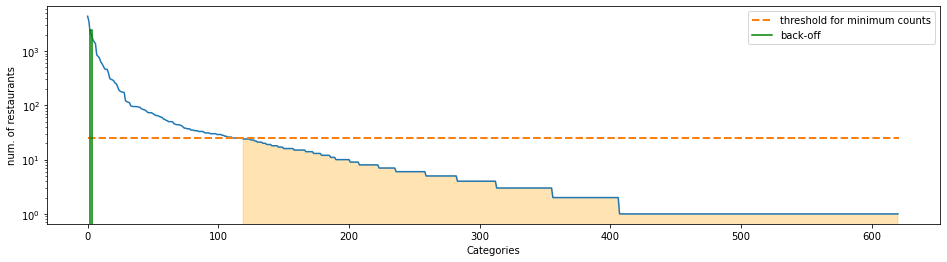

In [143]:
threshold = 25 # umbral
plt.figure(figsize=(16,4))
plt.plot(restaurantes_por_ciudad.values)
plt.plot([0,len(restaurantes_por_ciudad)],[threshold,threshold],linestyle="--",linewidth=2,label='threshold for minimum counts')
plt.xlabel('Categories')
plt.ylabel('num. of restaurants')
plt.yscale('log')
corte = np.where(restaurantes_por_ciudad.values<threshold)[0][0]
plt.fill_between(range(corte, len(restaurantes_por_ciudad)), 
                restaurantes_por_ciudad.values[corte:],
                color='orange',
                alpha=0.3)
suma_corte = restaurantes_por_ciudad.iloc[corte:].sum()
posicion_barra = np.where(restaurantes_por_ciudad.values<suma_corte)[0][0]
plt.plot([posicion_barra,posicion_barra, posicion_barra+1,posicion_barra+1],[0,suma_corte, suma_corte,0], color='green', label='back-off')
plt.legend()


El código *back-off* recogería los conteos de las ciudades que se encuentran en el área sombreada de la figura. 

Una manera de implementarlo en python puede ser

In [144]:
class bin_counter(object):
    def __init__(self, back_off_threshold = 0):
        self.back_off_threshold = back_off_threshold
        self.backed_off_categories = []
        pass
    def fit_transform(self, x, y):
        self.fit(x,y)
        return self.transform(x)
    def transform(self, x):
        N = len(x)
        output = np.empty((N, self.d))
        x_categories = np.unique(x)
        for cat in x_categories:
            if cat not in self.code_book:
                code = self.code_book['average']
            elif cat in self.backed_off_categories:
                code = self.code_book['back-off']
            else:
                code = self.code_book[cat]
            posi = np.where(x==cat)[0]
            output[posi,:] = code
        return output
    def fit(self, x, y):
        self.code_book = {}
        N = len(x)
        y_categories = np.unique(y)
        self.d = len(y_categories)
        x_categories = np.unique(x)
        num_x_categories = len(x_categories)
        y_ohe = OneHotEncoder(sparse=False).fit_transform(y.reshape(-1,1))
        back_off_counts = np.zeros(self.d)
        num_back_off = 0
        for cat in x_categories:
            posi = np.where(x==cat)[0]
            if len(posi) >= self.back_off_threshold:
                code = np.mean(y_ohe[posi,:],0)
                self.code_book[cat] = code
            else:
                self.backed_off_categories.append(cat)
                back_off_counts += np.sum(y_ohe[posi,:],0)
                num_back_off += len(posi)
        if num_back_off > 0:
            self.code_book['back-off']  = back_off_counts / num_back_off
        self.code_book['average'] =  np.mean(y_ohe,0)

In [145]:
bc_100 = bin_counter(back_off_threshold=200)
city_100_bin_counted_train = bc_100.fit_transform(restaurantes_100_train['city'].values,
       restaurantes_100_train['stars'].values)
city_100_bin_counted_test = bc_100.transform(restaurantes_100_test['city'].values)

In [146]:
bc_100.backed_off_categories

['Akron',
 'Concord',
 'Etobicoke',
 'Laval',
 'Matthews',
 'Newmarket',
 'North Las Vegas',
 'Peoria',
 'Surprise']

In [147]:
bc_100.code_book

{'Brampton': array([0.01612903, 0.02903226, 0.08064516, 0.1       , 0.2       ,
        0.20967742, 0.26774194, 0.07741935, 0.01935484]),
 'Calgary': array([0.00680272, 0.02102659, 0.05071119, 0.09585652, 0.19604205,
        0.25293754, 0.23500309, 0.11255411, 0.02906617]),
 'Champaign': array([0.00456621, 0.03652968, 0.0913242 , 0.09589041, 0.23744292,
        0.28767123, 0.16438356, 0.06392694, 0.01826484]),
 'Chandler': array([0.00653595, 0.01742919, 0.06753813, 0.07843137, 0.18518519,
        0.24618736, 0.25272331, 0.12418301, 0.02178649]),
 'Charlotte': array([0.01350439, 0.03916273, 0.06414585, 0.08642809, 0.17420662,
        0.2255233 , 0.25523295, 0.12018906, 0.02160702]),
 'Cleveland': array([0.02133333, 0.028     , 0.04933333, 0.108     , 0.12666667,
        0.19466667, 0.27866667, 0.15066667, 0.04266667]),
 'Gilbert': array([0.00332226, 0.01328904, 0.04651163, 0.10963455, 0.19601329,
        0.21594684, 0.26910299, 0.12624585, 0.01993355]),
 'Glendale': array([0.00257069, 0

### Gestión del conteo de *bins* y problemas de *leakage*

En aplicaciones donde se reciban nuevos datos periódicamente los conteos de *bin* necesitan de **mantenimiento**, porque si las estadística del problema cambia, los conteos van a cambiar. En estos casos debemos ser cuidadosos para evitar un problema de *leakage* o **fuga de información de la salida a la entrada** que pueda desembocar en un grave problema de **sobreajuste** u *overfitting*.

El *leakage* sucede cuando inconscientemente usamos información de la variable *target* para construir las características, a través de un determinado conjunto de entrenamiento, y luego empleamos ese mismo conjunto, con las variables categóricas transformadas mediante conteos de *bin*, para entrenar el modelo. El problema que existe es que en los conteos de *bin* estamos usando los valores de la variable *target* para calcular las probabilidades, por lo que puede los valores de estas probabilidades dependen directamente de los ejemplos de observaciones y *targets* que hayamos empleado para calcularlas, es decir, **estamos introduciendo explícitamnte información del target en las características**. 



<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />


Está claro que en aprendizaje automático se **asume** que hay una relación entre las observaciones, representadas mediante las características, y la variable *target* que queremos capturar con el modelo. Pero si utilizamos como conjunto de entrenamiento para aprender el modelo el mismo conjunto que hemos usado para aprender las características *conteo de bin*, se da la circunstancia de que en este conjunto los valores particulares de las características están especialmente ajustados a los valores particulares de la variable *target*, y el modelo puede capturar esta relación en lugar de la relación que nos interesa, lo cuál resulta en un alto riesgo de sobreajuste. 

Para evitar este riesgo lo más fácil es **dividir el conjunto de entrenamiento en dos partes** y usar una para aprender los conteos de bin y la otra para aprender el modelo.

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />
